# Importing and previewing the Dataset


In [1]:
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import holidays

In [2]:
with open("DSML_SS19_Bike_Sharing_DataSet.pkl", "rb") as ds:
    data= pickle.load(ds)

In [3]:
data.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID                           CUSTOMER_HAL_ID  \
0        29433847          108784  00DC95D85FFA09ED51196794705BE94187D5AD3E   
1        29433749          119974  B405842BAAAF3E30D7F81E6ED5FA070BD8EAF0BF   
2        29433904          109899  F507D1ADD070527615165519625291F48CB9A27A   
3        29433803          110244  0FDFCE9473C19A5A0C3CEC3E7C06E9FCAA68F251   
4        29434100          119936  C40EB896C4D6CCCA992355297BD30D52110560A2   

         DATE_BOOKING           DATE_FROM          DATE_UNTIL  \
0 2015-05-01 00:14:11 2015-05-01 00:14:11 2015-05-01 00:27:27   
1 2015-05-01 00:02:13 2015-05-01 00:02:13 2015-05-01 00:22:14   
2 2015-05-01 00:18:39 2015-05-01 00:18:39 2015-05-01 00:32:56   
3 2015-05-01 00:08:10 2015-05-01 00:08:10 2015-05-01 00:17:52   
4 2015-05-01 00:41:19 2015-05-01 00:41:19 2015-05-01 01:06:29   

                         START_RENTAL_ZONE  START_RENTAL_ZONE_HAL_ID  \
0                 Reeperbahn / Königstraße                  131902.0   
1          Eduard-Rhein-Ufer / Schwanenwik                  140800.0   
2                         7400 Marienplatz                   62689.0   
3                                      NaN                    9889.0   
4  Bahnhof Dammtor Süd / Marseiller Straße                  138382.0   

                    END_RENTAL_ZONE  END_RENTAL_ZONE_HAL_ID CITY_RENTAL_ZONE  
0  Bahnhof Altona West / Busbahnhof                131889.0          Hamburg  
1  Eppendorfer Weg/Hoheluftchaussee                198086.0          Hamburg  
2                  7300 Bebelstraße                 62971.0        Stuttgart  
3                               NaN                     NaN             Köln  
4         Saarlandstraße/Wiesendamm                203890.0          Hamburg

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10712694 entries, 0 to 10712693
Data columns (total 11 columns):
BOOKING_HAL_ID              int64
VEHICLE_HAL_ID              int64
CUSTOMER_HAL_ID             object
DATE_BOOKING                datetime64[ns]
DATE_FROM                   datetime64[ns]
DATE_UNTIL                  datetime64[ns]
START_RENTAL_ZONE           object
START_RENTAL_ZONE_HAL_ID    float64
END_RENTAL_ZONE             object
END_RENTAL_ZONE_HAL_ID      float64
CITY_RENTAL_ZONE            object
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 899.0+ MB


## Creating a new Dataframe

Since our Group is focussing on the bike-rental-demand in Munich only, we create a new Dataframe that excludes instances recorded in other cities. Then, we reindex our new Dataframe, because otherwise the indices would still refer to where one instance was located in the "All-Cities" Dataset, which will most likely have no further relevance for us. 

In [5]:
dset = data.groupby('CITY_RENTAL_ZONE').get_group("München")

## NOTE:

We need to remember to take care of the null-values in START_RENTAL_ZONE, END_RENTAL_ZONE & their HAL_IDs later on !

In [6]:
dset = dset.reset_index(drop = True)  # drop = True removes old index column 
dset = dset.drop(columns = "CITY_RENTAL_ZONE")
dset = dset.set_index("DATE_BOOKING")

In [7]:
dset.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID  \
DATE_BOOKING                                          
2015-05-01 00:39:30        29434075          107021   
2015-05-01 00:29:56        29433981          107185   
2015-05-01 02:17:58        29434899          106863   
2015-05-01 01:21:04        29434432          107524   
2015-05-01 01:33:02        29434530          107376   

                                              CUSTOMER_HAL_ID  \
DATE_BOOKING                                                    
2015-05-01 00:39:30  D0F36C1ABF3B608012F9F4D00D0EF8C6DA13801A   
2015-05-01 00:29:56  6DA7EBF532051C36DEEDC13BA58D5820C06CD099   
2015-05-01 02:17:58  9C5A3E80300107E4F867C9D0962FFD79FD724E02   
2015-05-01 01:21:04  264660C69328B2FAEF2E901D6E914D46AE648C4B   
2015-05-01 01:33:02  1C6F0D912526E8048420EECB89B87B2E664F91C8   

                              DATE_FROM          DATE_UNTIL START_RENTAL_ZONE  \
DATE_BOOKING                                                                    
2015-05-01 00:39:30 2015-05-01 00:39:30 2015-05-01 00:49:04               NaN   
2015-05-01 00:29:56 2015-05-01 00:29:56 2015-05-01 00:35:14               NaN   
2015-05-01 02:17:58 2015-05-01 02:17:58 2015-05-01 02:20:55               NaN   
2015-05-01 01:21:04 2015-05-01 01:21:04 2015-05-01 01:38:18               NaN   
2015-05-01 01:33:02 2015-05-01 01:33:02 2015-05-01 01:44:14               NaN   

                     START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
DATE_BOOKING                                                    
2015-05-01 00:39:30                    4322.0             NaN   
2015-05-01 00:29:56                     323.0             NaN   
2015-05-01 02:17:58                  117008.0             NaN   
2015-05-01 01:21:04                  117008.0             NaN   
2015-05-01 01:33:02                   14197.0             NaN   

                     END_RENTAL_ZONE_HAL_ID  
DATE_BOOKING                                 
2015-05-01 00:39:30                 16141.0  
2015-05-01 00:29:56                 43654.0  
2015-05-01 02:17:58                  6746.0  
2015-05-01 01:21:04                   437.0  
2015-05-01 01:33:02                     NaN

## Adding Weather Data

The hourly CDC Climate DataSet (for Germany) includes multiple different attributes:


* air_temperature
* cloud_type
* cloudiness
* precipitation
* pressure
* soil_temperature
* solar
* sun
* visibility
* wind


It is very likely that there is very little to no correlation between many of these attributes and the bike-rental demand.We decided to use air_temperature, cloudiness, precipitation, sun & wind for now. During DataExploration we will decide which ones we might simplify, remove or (together with one or multiple other attributes) aggregate into one object (e.g. a "weather" object could tell weather it is sunny, rainy, or cloudy). Before we can do that tough, we will have to manipulate the new datasets so that they fit the scheme of our bike-rental set. 


After downloading the datasets, we need to cut out everything but the timeperiod of interest and merge it with our dataset. 


## Temperature

### Loading .csv and setting date as index

In [8]:
temperature = pd.read_csv(".\\Weather_Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\air-temperature\\stundenwerte_TU_03379_19970701_20181231_hist\\air_temp.txt", sep = ";")

temperature["DATUM"] = pd.to_datetime(temperature["MESS_DATUM"].astype(str), format="%Y%m%d%H")
temperature = temperature.drop(columns = 'MESS_DATUM')
temperature = temperature.set_index("DATUM")
temperature = temperature.loc["2015-05-01":"2017-05-01"]

### Dropping unneccesary columns and renaming the rest

In [9]:
temperature = temperature.drop(columns = ["eor","QN_9","STATIONS_ID"])

temperature = temperature.rename(index=str, columns={"TT_TU":"TEMP", "RF_TU":"HUMIDITY"})

## Cloudiness

### Loading .csv and setting date as index

In [10]:
cloudiness = pd.read_csv(".\\Weather_Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\cloudiness\\stundenwerte_N_03379_19790101_20181231_hist\\cloudiness.txt", sep = ";")

cloudiness["DATUM"] = pd.to_datetime(cloudiness["MESS_DATUM"].astype(str), format="%Y%m%d%H")
cloudiness = cloudiness.drop(columns = 'MESS_DATUM')
cloudiness = cloudiness.set_index("DATUM")
cloudiness = cloudiness.loc["2015-05-01":"2017-05-01"]

### Dropping unneccesary columns and renaming the rest

In [11]:
cloudiness = cloudiness.drop(columns = ["eor","STATIONS_ID","QN_8","V_N_I"])

cloudiness = cloudiness.rename(columns={" V_N":"CLOUDINESS"})

## Precipitation

### Loading .csv and setting date as index

In [12]:
precipitation = pd.read_csv(".\\Weather_Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\precipitation\\stundenwerte_RR_03379_19970707_20181231_hist\\precipitation.txt", sep = ";")

precipitation["DATUM"] = pd.to_datetime(precipitation["MESS_DATUM"].astype(str), format="%Y%m%d%H")
precipitation = precipitation.drop(columns = 'MESS_DATUM')
precipitation = precipitation.set_index("DATUM")
precipitation = precipitation.loc["2015-05-01":"2017-05-01"]

### Dropping unneccesary columns and renaming the rest

In [13]:
precipitation = precipitation.drop(columns = ["STATIONS_ID","QN_8","eor","WRTR"])

precipitation = precipitation.rename(columns={"  R1":"PREC_HEIGHT_MM", "RS_IND":"RAIN_BINARY"})

## Sun

### Loading .csv and setting date as index

In [14]:
sun = pd.read_csv(".\\Weather_Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\sun\\stundenwerte_SD_03379_19850101_20181231_hist\\sun.txt", sep = ";")

sun["DATUM"] = pd.to_datetime(sun["MESS_DATUM"].astype(str), format="%Y%m%d%H")
sun = sun.drop(columns = 'MESS_DATUM')
sun = sun.set_index("DATUM")
sun = sun.loc["2015-05-01":"2017-05-01"]

### Dropping unneccesary columns and renaming the rest

In [15]:
sun = sun.drop(columns = ["STATIONS_ID","eor","QN_7"])

sun = sun.rename(columns={"SD_SO":"MIN_OF_SUN"})

## Wind

### Loading .csv and setting date as index

In [16]:
wind = pd.read_csv(".\\Weather_Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\wind\\stundenwerte_FF_03379_19850101_20181231_hist\\wind.txt", sep = ";")

wind["DATUM"] = pd.to_datetime(wind["MESS_DATUM"].astype(str), format="%Y%m%d%H")
wind = wind.drop(columns = 'MESS_DATUM')
wind = wind.set_index("DATUM")
wind = wind.loc["2015-05-01":"2017-05-01"]


### Dropping unneccesary columns and renaming the rest

In [17]:
wind = wind.drop(columns = ["STATIONS_ID", "QN_3", "eor", "   D"])

wind = wind.rename(columns= {"   F":"WIND_SPEED"})

# Merge Weather Data on Time Series Index

In [18]:
weather = pd.DataFrame(columns=["DATE"])
weather["DATE"] = pd.date_range(start = "2015-05-01", end = "2017-05-01", freq="1H")

### Adding DUMMY

In [19]:
weather["DUMMY"] = "DUMMY"
weather = weather.set_index("DATE")

weather = weather.merge(temperature, left_index=True, right_index=True, how="left")
weather = weather.merge(cloudiness, left_index=True, right_index=True, how="left")
weather = weather.merge(precipitation, left_index=True, right_index=True, how="left")
weather = weather.merge(sun, left_index=True, right_index=True, how="left")
weather = weather.merge(wind, left_index=True, right_index=True, how="left")

In [20]:
weather = weather.drop(columns = "DUMMY")

# Preview weather data

In [21]:
weather.head()

TEMP  HUMIDITY  CLOUDINESS  PREC_HEIGHT_MM  RAIN_BINARY  \
DATE                                                                           
2015-05-01 00:00:00   8.6      87.0         7.0             0.3          1.0   
2015-05-01 01:00:00   8.3      90.0         8.0             0.9          1.0   
2015-05-01 02:00:00   8.2      91.0         8.0             1.3          1.0   
2015-05-01 03:00:00   8.2      92.0         7.0             1.8          1.0   
2015-05-01 04:00:00   8.2      91.0         8.0             1.3          1.0   

                     MIN_OF_SUN  WIND_SPEED  
DATE                                         
2015-05-01 00:00:00         NaN         2.8  
2015-05-01 01:00:00         NaN         2.5  
2015-05-01 02:00:00         NaN         1.2  
2015-05-01 03:00:00         0.0         1.9  
2015-05-01 04:00:00         0.0         2.3

In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17545 entries, 2015-05-01 00:00:00 to 2017-05-01 00:00:00
Data columns (total 7 columns):
TEMP              17544 non-null float64
HUMIDITY          17544 non-null float64
CLOUDINESS        17456 non-null float64
PREC_HEIGHT_MM    17544 non-null float64
RAIN_BINARY       17544 non-null float64
MIN_OF_SUN        13131 non-null float64
WIND_SPEED        17525 non-null float64
dtypes: float64(7)
memory usage: 1.7 MB


In [23]:
weather.describe()

TEMP      HUMIDITY    CLOUDINESS  PREC_HEIGHT_MM   RAIN_BINARY  \
count  17544.000000  17544.000000  17456.000000    17544.000000  17544.000000   
mean       9.368981     71.826151      5.015238        0.102616      0.237973   
std       37.466963     42.748718      3.425066        0.531962      0.425855   
min     -999.000000   -999.000000     -1.000000        0.000000      0.000000   
25%        4.500000     60.000000      0.000000        0.000000      0.000000   
50%       10.200000     77.000000      7.000000        0.000000      0.000000   
75%       16.400000     89.000000      8.000000        0.000000      0.000000   
max       36.700000    100.000000      8.000000       16.700000      1.000000   

         MIN_OF_SUN    WIND_SPEED  
count  13131.000000  17525.000000  
mean      16.468357      2.567230  
std       24.001919     13.196004  
min        0.000000   -999.000000  
25%        0.000000      1.700000  
50%        0.000000      2.400000  
75%       36.500000      3.400000  
max       60.000000     11.900000

#### Cutting out last hour, because we accidentaly added 1 hour too much

In [24]:
#weather = weather[:-1]

# Handling missing values

## Replacing missing values with NaN

In [25]:
weather["TEMP"] = weather["TEMP"].replace(-999, pd.np.NaN )
weather["HUMIDITY"] = weather["HUMIDITY"].replace(-999, pd.np.NaN )
weather["WIND_SPEED"] = weather["WIND_SPEED"].replace(-999, pd.np.NaN )
weather["CLOUDINESS"] = weather["CLOUDINESS"].replace(-1, pd.np.NaN )

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17545 entries, 2015-05-01 00:00:00 to 2017-05-01 00:00:00
Data columns (total 7 columns):
TEMP              17521 non-null float64
HUMIDITY          17521 non-null float64
CLOUDINESS        17400 non-null float64
PREC_HEIGHT_MM    17544 non-null float64
RAIN_BINARY       17544 non-null float64
MIN_OF_SUN        13131 non-null float64
WIND_SPEED        17522 non-null float64
dtypes: float64(7)
memory usage: 1.7 MB


### Checking the missing values

In [27]:
weather.TEMP[weather["TEMP"].isnull()]

DATE
2016-01-02 13:00:00   NaN
2016-09-03 12:00:00   NaN
2016-09-03 13:00:00   NaN
2016-09-03 14:00:00   NaN
2016-09-03 15:00:00   NaN
2016-09-03 16:00:00   NaN
2016-09-03 17:00:00   NaN
2016-09-04 08:00:00   NaN
2016-09-04 09:00:00   NaN
2016-09-04 10:00:00   NaN
2016-09-04 11:00:00   NaN
2016-09-04 12:00:00   NaN
2016-09-04 13:00:00   NaN
2016-09-04 14:00:00   NaN
2016-09-04 15:00:00   NaN
2016-09-04 16:00:00   NaN
2016-09-04 17:00:00   NaN
2016-09-04 18:00:00   NaN
2016-09-04 19:00:00   NaN
2016-09-04 20:00:00   NaN
2016-09-05 09:00:00   NaN
2016-09-05 10:00:00   NaN
2016-09-05 11:00:00   NaN
2016-09-05 12:00:00   NaN
Name: TEMP, dtype: float64

In [28]:
weather.HUMIDITY[weather["HUMIDITY"].isnull()]

DATE
2016-01-02 13:00:00   NaN
2016-09-03 12:00:00   NaN
2016-09-03 13:00:00   NaN
2016-09-03 14:00:00   NaN
2016-09-03 15:00:00   NaN
2016-09-03 16:00:00   NaN
2016-09-03 17:00:00   NaN
2016-09-04 08:00:00   NaN
2016-09-04 09:00:00   NaN
2016-09-04 10:00:00   NaN
2016-09-04 11:00:00   NaN
2016-09-04 12:00:00   NaN
2016-09-04 13:00:00   NaN
2016-09-04 14:00:00   NaN
2016-09-04 15:00:00   NaN
2016-09-04 16:00:00   NaN
2016-09-04 17:00:00   NaN
2016-09-04 18:00:00   NaN
2016-09-04 19:00:00   NaN
2016-09-04 20:00:00   NaN
2016-09-05 09:00:00   NaN
2016-09-05 10:00:00   NaN
2016-09-05 11:00:00   NaN
2016-09-05 12:00:00   NaN
Name: HUMIDITY, dtype: float64

In [29]:
weather.CLOUDINESS[weather["CLOUDINESS"].isnull()]

DATE
2015-05-01 06:00:00   NaN
2015-05-01 07:00:00   NaN
2015-05-20 04:00:00   NaN
2015-05-20 11:00:00   NaN
2015-05-21 17:00:00   NaN
2015-06-08 05:00:00   NaN
2015-06-08 18:00:00   NaN
2015-06-15 02:00:00   NaN
2015-06-20 10:00:00   NaN
2015-07-07 05:00:00   NaN
2015-07-15 12:00:00   NaN
2015-08-20 19:00:00   NaN
2015-09-14 10:00:00   NaN
2015-09-14 11:00:00   NaN
2015-09-18 21:00:00   NaN
2015-09-23 02:00:00   NaN
2015-11-20 12:00:00   NaN
2015-11-20 20:00:00   NaN
2015-11-25 04:00:00   NaN
2015-11-25 05:00:00   NaN
2015-12-31 13:00:00   NaN
2016-01-02 13:00:00   NaN
2016-01-07 17:00:00   NaN
2016-01-08 21:00:00   NaN
2016-01-09 00:00:00   NaN
2016-01-09 13:00:00   NaN
2016-01-10 18:00:00   NaN
2016-01-10 23:00:00   NaN
2016-01-11 00:00:00   NaN
2016-01-12 10:00:00   NaN
                       ..
2016-09-04 19:00:00   NaN
2016-09-04 20:00:00   NaN
2016-09-05 09:00:00   NaN
2016-09-05 10:00:00   NaN
2016-09-05 11:00:00   NaN
2016-09-05 12:00:00   NaN
2016-09-05 13:00:00   NaN
2016-09

In [30]:
weather.PREC_HEIGHT_MM[weather["PREC_HEIGHT_MM"].isnull()]

DATE
2016-01-02 13:00:00   NaN
Name: PREC_HEIGHT_MM, dtype: float64

In [31]:
weather.RAIN_BINARY[weather["RAIN_BINARY"].isnull()]

DATE
2016-01-02 13:00:00   NaN
Name: RAIN_BINARY, dtype: float64

In [32]:
weather.MIN_OF_SUN[weather["MIN_OF_SUN"].isnull()]

DATE
2015-05-01 00:00:00   NaN
2015-05-01 01:00:00   NaN
2015-05-01 02:00:00   NaN
2015-05-01 21:00:00   NaN
2015-05-01 22:00:00   NaN
2015-05-01 23:00:00   NaN
2015-05-02 00:00:00   NaN
2015-05-02 01:00:00   NaN
2015-05-02 02:00:00   NaN
2015-05-02 21:00:00   NaN
2015-05-02 22:00:00   NaN
2015-05-02 23:00:00   NaN
2015-05-03 00:00:00   NaN
2015-05-03 01:00:00   NaN
2015-05-03 02:00:00   NaN
2015-05-03 21:00:00   NaN
2015-05-03 22:00:00   NaN
2015-05-03 23:00:00   NaN
2015-05-04 00:00:00   NaN
2015-05-04 01:00:00   NaN
2015-05-04 02:00:00   NaN
2015-05-04 21:00:00   NaN
2015-05-04 22:00:00   NaN
2015-05-04 23:00:00   NaN
2015-05-05 00:00:00   NaN
2015-05-05 01:00:00   NaN
2015-05-05 02:00:00   NaN
2015-05-05 21:00:00   NaN
2015-05-05 22:00:00   NaN
2015-05-05 23:00:00   NaN
                       ..
2017-04-26 01:00:00   NaN
2017-04-26 02:00:00   NaN
2017-04-26 21:00:00   NaN
2017-04-26 22:00:00   NaN
2017-04-26 23:00:00   NaN
2017-04-27 00:00:00   NaN
2017-04-27 01:00:00   NaN
2017-04

In [33]:
weather.WIND_SPEED[weather["WIND_SPEED"].isnull()]

DATE
2016-09-03 12:00:00   NaN
2016-09-03 13:00:00   NaN
2016-09-03 14:00:00   NaN
2016-09-03 15:00:00   NaN
2016-09-03 16:00:00   NaN
2016-09-03 17:00:00   NaN
2016-09-03 18:00:00   NaN
2016-09-04 09:00:00   NaN
2016-09-04 10:00:00   NaN
2016-09-04 11:00:00   NaN
2016-09-04 12:00:00   NaN
2016-09-04 13:00:00   NaN
2016-09-04 14:00:00   NaN
2016-09-04 15:00:00   NaN
2016-09-04 16:00:00   NaN
2016-09-04 17:00:00   NaN
2016-09-04 18:00:00   NaN
2016-09-04 19:00:00   NaN
2016-09-04 20:00:00   NaN
2016-09-05 10:00:00   NaN
2016-09-05 11:00:00   NaN
2016-09-05 12:00:00   NaN
2016-09-05 13:00:00   NaN
Name: WIND_SPEED, dtype: float64

### Replacing the values of MIN_OF_SUN from 21pm to 2am

In [34]:
for i in range(21, 24):
    weather.MIN_OF_SUN[weather.index.hour==i] = 0
    
for i in range(0, 3):
    weather.MIN_OF_SUN[weather.index.hour==i] = 0

In [35]:
weather.MIN_OF_SUN[weather["MIN_OF_SUN"].isnull()]

DATE
2016-09-02 13:00:00   NaN
2016-09-02 14:00:00   NaN
2016-09-02 15:00:00   NaN
2016-09-02 16:00:00   NaN
2016-09-03 12:00:00   NaN
2016-09-03 13:00:00   NaN
2016-09-03 14:00:00   NaN
2016-09-03 15:00:00   NaN
2016-09-03 16:00:00   NaN
2016-09-03 17:00:00   NaN
2016-09-03 18:00:00   NaN
2016-09-04 08:00:00   NaN
2016-09-04 09:00:00   NaN
2016-09-04 10:00:00   NaN
2016-09-04 11:00:00   NaN
2016-09-04 12:00:00   NaN
2016-09-04 13:00:00   NaN
2016-09-04 14:00:00   NaN
2016-09-04 15:00:00   NaN
2016-09-04 16:00:00   NaN
2016-09-04 17:00:00   NaN
2016-09-04 18:00:00   NaN
2016-09-05 09:00:00   NaN
2016-09-05 10:00:00   NaN
2016-09-05 11:00:00   NaN
2016-09-05 12:00:00   NaN
2016-09-05 13:00:00   NaN
Name: MIN_OF_SUN, dtype: float64

###  Function for filling in the missing values with the mean of the previous and following hour

def simple_2NN_impute_round(df,column = "column") :
   df[column] = round((df[column].fillna(method = "ffill")+df[column].fillna(method = "bfill"))/2)

def simple_2NN_impute(df,column = "column") :
   df[column] = (df[column].fillna(method = "ffill")+df[column].fillna(method = "bfill"))/2

In [36]:
#function thats decides to round or not
def simple_2NN_impute_round(df,column = "column", Round = False) :
    if Round == True :
       df[column] = round((df[column].fillna(method = "ffill")+df[column].fillna(method = "bfill"))/2)
    else :
       df[column] = (df[column].fillna(method = "ffill")+df[column].fillna(method = "bfill"))/2

### Filling in missing values

In [37]:
simple_2NN_impute_round(weather,"MIN_OF_SUN", True)
simple_2NN_impute_round(weather,"CLOUDINESS", True)
simple_2NN_impute_round(weather,"HUMIDITY", True)
simple_2NN_impute_round(weather,"PREC_HEIGHT_MM", False)
simple_2NN_impute_round(weather,"TEMP", False)
simple_2NN_impute_round(weather,"WIND_SPEED", False)




In [38]:
weather.CLOUDINESS[weather["CLOUDINESS"].isnull()]

Series([], Name: CLOUDINESS, dtype: float64)

### Checking for the precipitation on the timestamp the data is missing

In [39]:
weather.RAIN_BINARY[weather["RAIN_BINARY"].isnull()]

DATE
2016-01-02 13:00:00   NaN
Name: RAIN_BINARY, dtype: float64

In [40]:
if weather.PREC_HEIGHT_MM[weather["RAIN_BINARY"].isnull()].item() > 0 :
    weather.RAIN_BINARY[weather["RAIN_BINARY"].isnull()] = 1
else:
    weather.RAIN_BINARY[weather["RAIN_BINARY"].isnull()] = 0

In [41]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17545 entries, 2015-05-01 00:00:00 to 2017-05-01 00:00:00
Data columns (total 7 columns):
TEMP              17545 non-null float64
HUMIDITY          17545 non-null float64
CLOUDINESS        17545 non-null float64
PREC_HEIGHT_MM    17545 non-null float64
RAIN_BINARY       17545 non-null float64
MIN_OF_SUN        17545 non-null float64
WIND_SPEED        17545 non-null float64
dtypes: float64(7)
memory usage: 1.7 MB


# Updating both datasets

## Adding weather data to bike rental dataset

In [42]:
dset = dset.sort_index()
dset

BOOKING_HAL_ID  VEHICLE_HAL_ID  \
DATE_BOOKING                                          
2015-05-01 00:02:16        29433750          107702   
2015-05-01 00:06:55        29433792          107396   
2015-05-01 00:08:02        29433802          106336   
2015-05-01 00:11:09        29433829          107664   
2015-05-01 00:14:24        29433851          106375   
2015-05-01 00:17:21        29433883          108134   
2015-05-01 00:19:18        29433908          107681   
2015-05-01 00:19:40        29433912          109743   
2015-05-01 00:20:51        29433917          106787   
2015-05-01 00:29:56        29433981          107185   
2015-05-01 00:36:42        29434043          108000   
2015-05-01 00:39:30        29434075          107021   
2015-05-01 00:40:26        29434088          106085   
2015-05-01 00:41:38        29434104          107729   
2015-05-01 00:41:58        29434107          107740   
2015-05-01 00:42:22        29434110          107637   
2015-05-01 00:42:45        29434115          106124   
2015-05-01 00:43:11        29434119          106891   
2015-05-01 00:47:34        29434160          106863   
2015-05-01 00:53:47        29434211          106380   
2015-05-01 01:00:25        29434260          107674   
2015-05-01 01:03:23        29434274          107681   
2015-05-01 01:04:12        29434278          107357   
2015-05-01 01:04:46        29434287          106891   
2015-05-01 01:04:48        29434289          108152   
2015-05-01 01:04:55        29434290          106522   
2015-05-01 01:05:57        29434307          107555   
2015-05-01 01:06:28        29434313          107015   
2015-05-01 01:08:13        29434326          106121   
2015-05-01 01:09:08        29434335          107064   
...                             ...             ...   
2017-04-30 22:43:32        45964715          106468   
2017-04-30 22:43:54        45964720          107656   
2017-04-30 22:44:51        45964734          113586   
2017-04-30 22:47:25        45964774          107621   
2017-04-30 22:47:30        45964777          106690   
2017-04-30 22:49:10        45964805          107177   
2017-04-30 22:50:16        45964818          106605   
2017-04-30 22:51:31        45964833          106228   
2017-04-30 22:51:43        45964837          108350   
2017-04-30 22:52:42        45964856          117368   
2017-04-30 22:56:14        45964889          106121   
2017-04-30 22:57:00        45964900          107731   
2017-04-30 22:57:16        45964908          106449   
2017-04-30 22:58:48        45964937          107314   
2017-04-30 22:59:23        45964944          106828   
2017-04-30 23:00:03        45964953          106553   
2017-04-30 23:02:35        45964981          106824   
2017-04-30 23:05:03        45965002          110664   
2017-04-30 23:09:48        45965076          106376   
2017-04-30 23:14:01        45965129          115721   
2017-04-30 23:19:24        45965201          116643   
2017-04-30 23:19:54        45965207          113538   
2017-04-30 23:20:24        45965212          106252   
2017-04-30 23:23:25        45965249          106236   
2017-04-30 23:23:59        45965255          107591   
2017-04-30 23:25:02        45965267          107591   
2017-04-30 23:26:19        45965284          116991   
2017-04-30 23:38:52        45965413          116820   
2017-04-30 23:41:05        45965431          116828   
2017-04-30 23:58:15        45965612          108089   

                                              CUSTOMER_HAL_ID  \
DATE_BOOKING                                                    
2015-05-01 00:02:16  EF57C15EE4E45DF3BEB884F6A673DCC7E7C4BE26   
2015-05-01 00:06:55  7AB11A307B2A0B615BFFA3C85E22B65F17CCEAD8   
2015-05-01 00:08:02  D4CB2262153C30F58BC276DC4C2319058031AF9F   
2015-05-01 00:11:09  97E87775FF49898204916B80FA6D30A6ED0B0CDE   
2015-05-01 00:14:24  6CF5ED7089218392A8E9DBAD7288544E4E2B55CE   
2015-05-01 00:17:21  0CDAD6DD5DF6F509E10361A327C26097422028CD   
2015-05-01 00:19:18  1DF732F7882777

In [43]:
# we merged based on DATE_BOOKING, because thats the moment the customer decides whether he wants to rent or not. 

dset_m= pd.merge_asof(dset, weather,left_index = True, left_on = dset.index, right_on = weather.index, direction = "forward")
dset_m = dset_m.sort_index()

dset_m = dset_m.rename(columns = {"key_0":"DATE"})
dset_m = dset_m.set_index("DATE")

In [44]:
#todo: mean trip length (timedelta), number of bookings(count()), difference between DATE_BOOKING & DATE_FROM(timedelta)

In [45]:
# 4 set prepared(using time series cross validation) for evaluation:


tscv_split_1_train = dset_m.loc["2015-05-01 00:00:00":"2016-05-01 00:00:00"]
tscv_split_1_test = dset_m.loc["2016-05-01 00:00:00":"2016-08-01 00:00:00"]

tscv_split_2_train = dset_m.loc["2015-05-01 00:00:00":"2016-08-01 00:00:00"]
tscv_split_2_test = dset_m.loc["2016-08-01 00:00:00":"2016-11-01 00:00:00"]

tscv_split_3_train = dset_m.loc["2015-05-01 00:00:00":"2016-11-01 00:00:00"]
tscv_split_3_test = dset_m.loc["2016-11-01 00:00:00":"2017-02-01 00:00:00"]

tscv_split_4_train = dset_m.loc["2015-05-01 00:00:00":"2017-02-01 00:00:00"]
tscv_split_4_test = dset_m.loc["2017-02-01 00:00:00":"2017-05-01 00:00:00"]



# work_set is the one used for visualization & initially training different models
# work_set_test should not be looked at until testing, just like the 4 tscv_split test sets !




work_set_train = dset_m.loc["2015-05-01 00:00:00":"2016-11-01 00:00:00"]  # the one to use for now 
work_set_test = dset_m.loc["2016-11-01 00:00:00":"2017-05-01 00:00:00"]

work_set_train.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID  \
DATE                                                  
2015-05-01 00:02:16        29433750          107702   
2015-05-01 00:06:55        29433792          107396   
2015-05-01 00:08:02        29433802          106336   
2015-05-01 00:11:09        29433829          107664   
2015-05-01 00:14:24        29433851          106375   

                                              CUSTOMER_HAL_ID  \
DATE                                                            
2015-05-01 00:02:16  EF57C15EE4E45DF3BEB884F6A673DCC7E7C4BE26   
2015-05-01 00:06:55  7AB11A307B2A0B615BFFA3C85E22B65F17CCEAD8   
2015-05-01 00:08:02  D4CB2262153C30F58BC276DC4C2319058031AF9F   
2015-05-01 00:11:09  97E87775FF49898204916B80FA6D30A6ED0B0CDE   
2015-05-01 00:14:24  6CF5ED7089218392A8E9DBAD7288544E4E2B55CE   

                              DATE_FROM          DATE_UNTIL START_RENTAL_ZONE  \
DATE                                                                            
2015-05-01 00:02:16 2015-05-01 00:02:16 2015-05-01 00:19:56               NaN   
2015-05-01 00:06:55 2015-05-01 00:06:55 2015-05-01 00:20:57               NaN   
2015-05-01 00:08:02 2015-05-01 00:08:02 2015-05-01 00:17:48               NaN   
2015-05-01 00:11:09 2015-05-01 00:11:09 2015-05-01 00:24:28               NaN   
2015-05-01 00:14:24 2015-05-01 00:14:24 2015-05-01 00:23:08               NaN   

                     START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
DATE                                                            
2015-05-01 00:02:16                   33975.0             NaN   
2015-05-01 00:06:55                     377.0             NaN   
2015-05-01 00:08:02                   22766.0             NaN   
2015-05-01 00:11:09                   16215.0             NaN   
2015-05-01 00:14:24                   22783.0             NaN   

                     END_RENTAL_ZONE_HAL_ID  TEMP  HUMIDITY  CLOUDINESS  \
DATE                                                                      
2015-05-01 00:02:16                 49376.0   8.3      90.0         8.0   
2015-05-01 00:06:55                  8984.0   8.3      90.0         8.0   
2015-05-01 00:08:02                 34017.0   8.3      90.0         8.0   
2015-05-01 00:11:09                 40132.0   8.3      90.0         8.0   
2015-05-01 00:14:24                  9000.0   8.3      90.0         8.0   

                     PREC_HEIGHT_MM  RAIN_BINARY  MIN_OF_SUN  WIND_SPEED  
DATE                                                                      
2015-05-01 00:02:16             0.9          1.0         0.0         2.5  
2015-05-01 00:06:55             0.9          1.0         0.0         2.5  
2015-05-01 00:08:02             0.9          1.0         0.0         2.5  
2015-05-01 00:11:09             0.9          1.0         0.0         2.5  
2015-05-01 00:14:24             0.9          1.0         0.0         2.5

# Analysing weekly behaviour

In [46]:
# count bookings per hour
dset_h = work_set_train.resample("H", how ={"BOOKING_HAL_ID":"count"})
dset_h = dset_h.rename(columns = {"BOOKING_HAL_ID":"BOOKING_COUNT"})
dset_h.head(1)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


BOOKING_COUNT
DATE                     
2015-05-01             20

In [47]:
#merging weatherset with bookings/hour

dset_h = dset_h.merge(weather, left_index = True,right_index=True,how = "left")
dset_h.head()

BOOKING_COUNT  TEMP  HUMIDITY  CLOUDINESS  \
DATE                                                             
2015-05-01 00:00:00             20   8.6      87.0         7.0   
2015-05-01 01:00:00             24   8.3      90.0         8.0   
2015-05-01 02:00:00             20   8.2      91.0         8.0   
2015-05-01 03:00:00             20   8.2      92.0         7.0   
2015-05-01 04:00:00             10   8.2      91.0         8.0   

                     PREC_HEIGHT_MM  RAIN_BINARY  MIN_OF_SUN  WIND_SPEED  
DATE                                                                      
2015-05-01 00:00:00             0.3          1.0         0.0         2.8  
2015-05-01 01:00:00             0.9          1.0         0.0         2.5  
2015-05-01 02:00:00             1.3          1.0         0.0         1.2  
2015-05-01 03:00:00             1.8          1.0         0.0         1.9  
2015-05-01 04:00:00             1.3          1.0         0.0         2.3

In [48]:
work_set_train["TRIP_LENGTH"] = work_set_train["DATE_UNTIL"] - work_set_train["DATE_FROM"]
work_set_train["TRIP_LENGTH"] = work_set_train["TRIP_LENGTH"] / np.timedelta64(1, "m")

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
work_set_train.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID  \
DATE                                                  
2015-05-01 00:02:16        29433750          107702   
2015-05-01 00:06:55        29433792          107396   
2015-05-01 00:08:02        29433802          106336   
2015-05-01 00:11:09        29433829          107664   
2015-05-01 00:14:24        29433851          106375   

                                              CUSTOMER_HAL_ID  \
DATE                                                            
2015-05-01 00:02:16  EF57C15EE4E45DF3BEB884F6A673DCC7E7C4BE26   
2015-05-01 00:06:55  7AB11A307B2A0B615BFFA3C85E22B65F17CCEAD8   
2015-05-01 00:08:02  D4CB2262153C30F58BC276DC4C2319058031AF9F   
2015-05-01 00:11:09  97E87775FF49898204916B80FA6D30A6ED0B0CDE   
2015-05-01 00:14:24  6CF5ED7089218392A8E9DBAD7288544E4E2B55CE   

                              DATE_FROM          DATE_UNTIL START_RENTAL_ZONE  \
DATE                                                                            
2015-05-01 00:02:16 2015-05-01 00:02:16 2015-05-01 00:19:56               NaN   
2015-05-01 00:06:55 2015-05-01 00:06:55 2015-05-01 00:20:57               NaN   
2015-05-01 00:08:02 2015-05-01 00:08:02 2015-05-01 00:17:48               NaN   
2015-05-01 00:11:09 2015-05-01 00:11:09 2015-05-01 00:24:28               NaN   
2015-05-01 00:14:24 2015-05-01 00:14:24 2015-05-01 00:23:08               NaN   

                     START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
DATE                                                            
2015-05-01 00:02:16                   33975.0             NaN   
2015-05-01 00:06:55                     377.0             NaN   
2015-05-01 00:08:02                   22766.0             NaN   
2015-05-01 00:11:09                   16215.0             NaN   
2015-05-01 00:14:24                   22783.0             NaN   

                     END_RENTAL_ZONE_HAL_ID  TEMP  HUMIDITY  CLOUDINESS  \
DATE                                                                      
2015-05-01 00:02:16                 49376.0   8.3      90.0         8.0   
2015-05-01 00:06:55                  8984.0   8.3      90.0         8.0   
2015-05-01 00:08:02                 34017.0   8.3      90.0         8.0   
2015-05-01 00:11:09                 40132.0   8.3      90.0         8.0   
2015-05-01 00:14:24                  9000.0   8.3      90.0         8.0   

                     PREC_HEIGHT_MM  RAIN_BINARY  MIN_OF_SUN  WIND_SPEED  \
DATE                                                                       
2015-05-01 00:02:16             0.9          1.0         0.0         2.5   
2015-05-01 00:06:55             0.9          1.0         0.0         2.5   
2015-05-01 00:08:02             0.9          1.0         0.0         2.5   
2015-05-01 00:11:09             0.9          1.0         0.0         2.5   
2015-05-01 00:14:24             0.9          1.0         0.0         2.5   

                     TRIP_LENGTH  
DATE                              
2015-05-01 00:02:16    17.666667  
2015-05-01 00:06:55    14.033333  
2015-05-01 00:08:02     9.766667  
2015-05-01 00:11:09    13.316667  
2015-05-01 00:14:24     8.733333

In [50]:
# average trip length/hour
bookings_q = work_set_train.resample("H", how ={"TRIP_LENGTH":"mean"})
bookings_q.head()

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


TRIP_LENGTH
DATE                            
2015-05-01 00:00:00     9.131667
2015-05-01 01:00:00    13.791667
2015-05-01 02:00:00    10.284167
2015-05-01 03:00:00     6.642500
2015-05-01 04:00:00     5.795000

In [51]:
dset_h = dset_h.merge(bookings_q,left_index = True,right_index=True,how = "left")
dset_h.head()

BOOKING_COUNT  TEMP  HUMIDITY  CLOUDINESS  \
DATE                                                             
2015-05-01 00:00:00             20   8.6      87.0         7.0   
2015-05-01 01:00:00             24   8.3      90.0         8.0   
2015-05-01 02:00:00             20   8.2      91.0         8.0   
2015-05-01 03:00:00             20   8.2      92.0         7.0   
2015-05-01 04:00:00             10   8.2      91.0         8.0   

                     PREC_HEIGHT_MM  RAIN_BINARY  MIN_OF_SUN  WIND_SPEED  \
DATE                                                                       
2015-05-01 00:00:00             0.3          1.0         0.0         2.8   
2015-05-01 01:00:00             0.9          1.0         0.0         2.5   
2015-05-01 02:00:00             1.3          1.0         0.0         1.2   
2015-05-01 03:00:00             1.8          1.0         0.0         1.9   
2015-05-01 04:00:00             1.3          1.0         0.0         2.3   

                     TRIP_LENGTH  
DATE                              
2015-05-01 00:00:00     9.131667  
2015-05-01 01:00:00    13.791667  
2015-05-01 02:00:00    10.284167  
2015-05-01 03:00:00     6.642500  
2015-05-01 04:00:00     5.795000

In [52]:
dset_h.rename(columns = {"TRIP_LENGTH" : "AVG_TRIP_LENGTH"}, inplace = True )

In [53]:
dset_h.head()

BOOKING_COUNT  TEMP  HUMIDITY  CLOUDINESS  \
DATE                                                             
2015-05-01 00:00:00             20   8.6      87.0         7.0   
2015-05-01 01:00:00             24   8.3      90.0         8.0   
2015-05-01 02:00:00             20   8.2      91.0         8.0   
2015-05-01 03:00:00             20   8.2      92.0         7.0   
2015-05-01 04:00:00             10   8.2      91.0         8.0   

                     PREC_HEIGHT_MM  RAIN_BINARY  MIN_OF_SUN  WIND_SPEED  \
DATE                                                                       
2015-05-01 00:00:00             0.3          1.0         0.0         2.8   
2015-05-01 01:00:00             0.9          1.0         0.0         2.5   
2015-05-01 02:00:00             1.3          1.0         0.0         1.2   
2015-05-01 03:00:00             1.8          1.0         0.0         1.9   
2015-05-01 04:00:00             1.3          1.0         0.0         2.3   

                     AVG_TRIP_LENGTH  
DATE                                  
2015-05-01 00:00:00         9.131667  
2015-05-01 01:00:00        13.791667  
2015-05-01 02:00:00        10.284167  
2015-05-01 03:00:00         6.642500  
2015-05-01 04:00:00         5.795000

In [54]:
work_set_train["TIME_UNTIL_START"] = work_set_train["DATE_FROM"] - work_set_train.index
work_set_train["TIME_UNTIL_START"] = work_set_train["TIME_UNTIL_START"] / np.timedelta64(1, "m")
bookings_z = work_set_train.resample("H", how ={"TIME_UNTIL_START":"mean"})
a = bookings_z.TIME_UNTIL_START[bookings_z["TIME_UNTIL_START"] > 0]
a

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample

Series([], Freq: H, Name: TIME_UNTIL_START, dtype: float64)

In [55]:
#looking for bookings with a difference between DATE_BOOKING & DATE_FROM

dset.index[dset["DATE_FROM"] != dset.index]

# no need to add "TIME_UNTIL_START", because there are no bookings with a diff between DATE_BOOKING & DATE_FROM

DatetimeIndex([], dtype='datetime64[ns]', name='DATE_BOOKING', freq=None)

# Hypothesis Generation: 

1. The demand for bikes is higher during the weekend due to more freetime
2. Rides during the weekend are longer because they dont necessarily only serve the purpose of getting to a certain place in time
* Higher Tempererature means more people using bikes and vice versa
* Rain means less people using bikes 
* Cloudiness means less people using bikes
* Strong Winds means less people using bikes
* Holidays means bikes are being used more randomly than during working season
* Avg age of costumers is rather low (~25yrs) 
* Trip length varies based on location
* High traffic means higher demand for bikes as an alternative
* Most (weekday -) rentals occur during the early hours & after-work-time
* More Bike rentals occure during Summer Time
* As days are longer during summer, more people will book bikes later in the evening
* Bike rentals are reduced significantly during christmas Holiday
* Distance towards next train/Subway/Bus station has an influence on bike rental demand 
* Bike rentals rise when frequency of train-ride-options decreases (e.g. if after 9pm trains go less often)
* There are more short rides(10 - 20 mins) than long rides (30 mins +)  -> histogram
* Trip length correllates with limitations of subscriptions (e.g. students may be able to use bikes for free up to 30 mins) 
* Less people rent bikes at night



# suggestion: include traffic data in the prediction 

* road traffic
* train/subway traffic 


# Preparing copy of dset_h and manipulating it for visualization

In [56]:
prototype = dset_h
prototype

BOOKING_COUNT  TEMP  HUMIDITY  CLOUDINESS  \
DATE                                                             
2015-05-01 00:00:00             20   8.6      87.0         7.0   
2015-05-01 01:00:00             24   8.3      90.0         8.0   
2015-05-01 02:00:00             20   8.2      91.0         8.0   
2015-05-01 03:00:00             20   8.2      92.0         7.0   
2015-05-01 04:00:00             10   8.2      91.0         8.0   
2015-05-01 05:00:00              6   8.2      92.0         8.0   
2015-05-01 06:00:00              4   8.5      91.0         8.0   
2015-05-01 07:00:00              7   8.8      90.0         8.0   
2015-05-01 08:00:00             10   9.7      89.0         7.0   
2015-05-01 09:00:00             11  10.0      84.0         8.0   
2015-05-01 10:00:00             14  10.3      85.0         7.0   
2015-05-01 11:00:00              8   9.9      92.0         8.0   
2015-05-01 12:00:00              3   9.8      94.0         8.0   
2015-05-01 13:00:00              9  10.1      93.0         8.0   
2015-05-01 14:00:00              8  10.5      94.0         8.0   
2015-05-01 15:00:00              8  10.9      95.0         8.0   
2015-05-01 16:00:00             10  10.7      94.0         8.0   
2015-05-01 17:00:00             19  10.5      95.0         7.0   
2015-05-01 18:00:00             21  10.4      95.0         8.0   
2015-05-01 19:00:00             17  10.2      95.0         8.0   
2015-05-01 20:00:00             12   9.9      97.0         8.0   
2015-05-01 21:00:00              5   9.2      96.0         8.0   
2015-05-01 22:00:00              1   9.3      97.0         8.0   
2015-05-01 23:00:00             10   9.3      96.0         7.0   
2015-05-02 00:00:00              4   8.8      96.0         8.0   
2015-05-02 01:00:00             12   8.5      96.0         7.0   
2015-05-02 02:00:00              5   8.3      96.0         7.0   
2015-05-02 03:00:00              5   8.1      96.0         7.0   
2015-05-02 04:00:00              4   8.0      96.0         8.0   
2015-05-02 05:00:00              2   7.9      95.0         7.0   
...                            ...   ...       ...         ...   
2016-10-30 18:00:00             27   7.5      84.0         0.0   
2016-10-30 19:00:00             26   6.9      89.0         7.0   
2016-10-30 20:00:00             10   6.0      92.0         6.0   
2016-10-30 21:00:00             16   8.2      88.0         8.0   
2016-10-30 22:00:00             27   8.4      83.0         8.0   
2016-10-30 23:00:00              7   8.5      81.0         8.0   
2016-10-31 00:00:00             10   8.5      80.0         8.0   
2016-10-31 01:00:00              5   8.2      82.0         8.0   
2016-10-31 02:00:00              1   8.0      84.0         8.0   
2016-10-31 03:00:00              0   7.0      85.0         5.0   
2016-10-31 04:00:00              3   4.8      93.0         0.0   
2016-10-31 05:00:00              2   4.3      95.0         0.0   
2016-10-31 06:00:00             12   4.4      96.0         0.0   
2016-10-31 07:00:00             30   4.6      94.0         0.0   
2016-10-31 08:00:00             59   6.8      84.0         0.0   
2016-10-31 09:00:00             51   8.5      72.0         0.0   
2016-10-31 10:00:00             35  10.3      64.0         0.0   
2016-10-31 11:00:00             41  10.7      61.0         0.0   
2016-10-31 12:00:00             53  11.5      59.0         0.0   
2016-10-31 13:00:00             42  11.8      60.0         0.0   
2016-10-31 14:00:00             50  12.1      59.0         0.0   
2016-10-31 15:00:00             50  11.5      64.0         0.0   
2016-10-31 16:00:00             58   9.6      73.0         0.0   
2016-10-31 17:00:00             67   7.9      83.0         0.0   
2016-10-31 18:00:00             78   6.5      90.0         0.0   
2016-10-31 19:00:00             63   5.3      92.0         0.0   
2016-10-31 20:00:00             39   5.0      94.0         0.0   
2016-10-31 21:00:00             29   4.2      95.0         0.

## adding "SEASON" feature

In [57]:
def get_season(DatetimeIndex):
    
    #note: we chose meteorologic seasons instead of astrologic seasons in respect to the importance of weather in our predicition task
    
    
    month = DatetimeIndex.month
    
    
    if month in range (3, 6):
        return "spring"
    
    elif month in range(6, 9):
        return "summer"
    
    elif month in range(9, 12):
        return "fall"
    
    else:
        return "winter"


In [58]:
prototype.reset_index(inplace = True)

In [59]:
prototype["SEASON"] = prototype["DATE"].apply(get_season)

In [60]:
prototype.set_index("DATE", inplace = True)

## adding binary "WORKING_DAY" feature

In [61]:
bavaria_holidays = holidays.CountryHoliday('DE', prov="BY")


In [62]:
'2015-08-15' in bavaria_holidays # quick check if it works: Mariä Himmelfahrt 2015

True

In [63]:
# prototype.index[1].date()

def is_working_day(DatetimeIndex):
    
    date = DatetimeIndex.date()
    weekday = DatetimeIndex.weekday()
                   
    if date in bavaria_holidays :
        return 0
    elif weekday > 4 :
        return 0
    else :
        return 1

In [64]:
prototype.reset_index(inplace=True)

In [65]:
prototype["WORKING_DAY"] = prototype["DATE"].apply(is_working_day)

In [66]:
prototype.set_index("DATE", inplace = True)

In [67]:
prototype.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13200 entries, 2015-05-01 00:00:00 to 2016-10-31 23:00:00
Data columns (total 11 columns):
BOOKING_COUNT      13200 non-null int64
TEMP               13200 non-null float64
HUMIDITY           13200 non-null float64
CLOUDINESS         13200 non-null float64
PREC_HEIGHT_MM     13200 non-null float64
RAIN_BINARY        13200 non-null float64
MIN_OF_SUN         13200 non-null float64
WIND_SPEED         13200 non-null float64
AVG_TRIP_LENGTH    12917 non-null float64
SEASON             13200 non-null object
WORKING_DAY        13200 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.2+ MB


# adding "DAY_OF_WEEK" feature 

In [68]:
prototype["DAY_OF_WEEK"] = prototype.index.weekday


In [69]:
prototype.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13200 entries, 2015-05-01 00:00:00 to 2016-10-31 23:00:00
Data columns (total 12 columns):
BOOKING_COUNT      13200 non-null int64
TEMP               13200 non-null float64
HUMIDITY           13200 non-null float64
CLOUDINESS         13200 non-null float64
PREC_HEIGHT_MM     13200 non-null float64
RAIN_BINARY        13200 non-null float64
MIN_OF_SUN         13200 non-null float64
WIND_SPEED         13200 non-null float64
AVG_TRIP_LENGTH    12917 non-null float64
SEASON             13200 non-null object
WORKING_DAY        13200 non-null int64
DAY_OF_WEEK        13200 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.3+ MB


# Changing Seaborn Settings for plots:


In [70]:
sns.set_style("whitegrid")


# Hypothesis 1: The demand for bikes is higher during the weekend due to more freetime. 

In [71]:
to_visualize = prototype.groupby([prototype.index.weekday])["BOOKING_COUNT"].sum()
to_visualize = to_visualize.reset_index()
to_visualize 

DATE  BOOKING_COUNT
0     0          84873
1     1          89518
2     2          91591
3     3          92241
4     4          98361
5     5          88633
6     6          74531

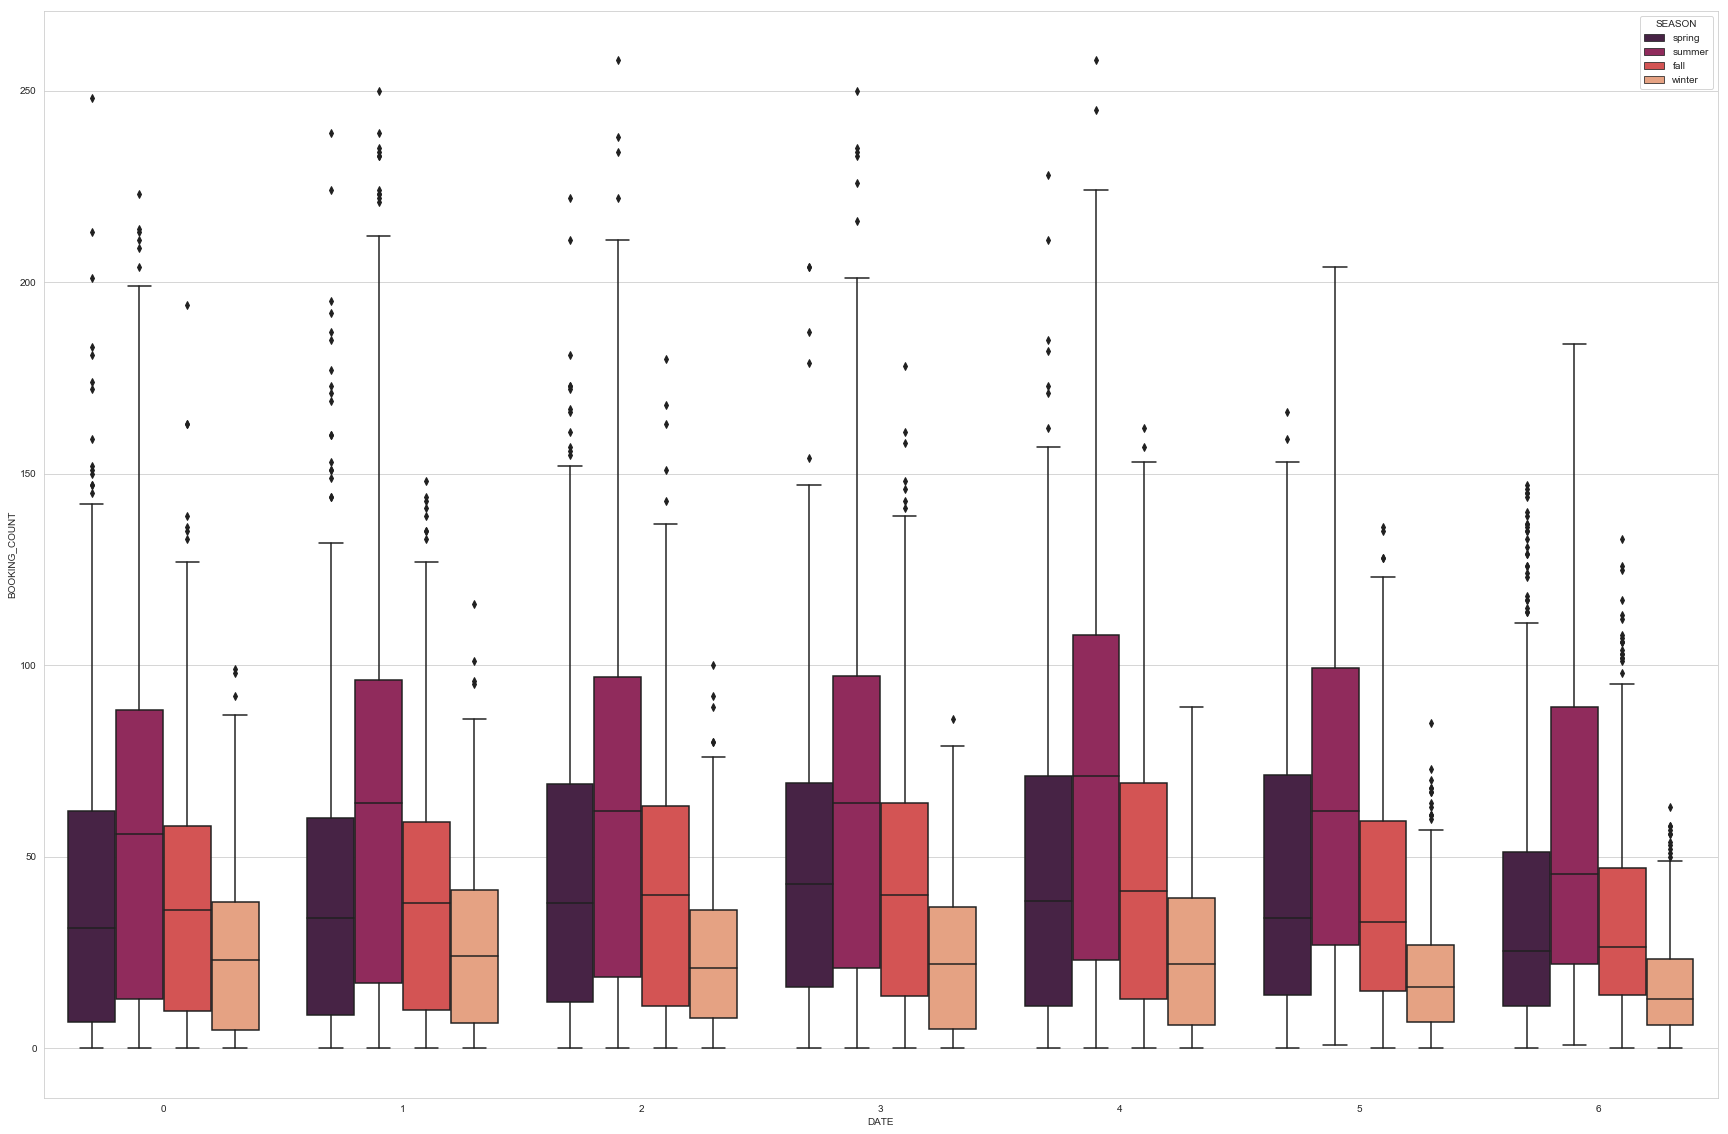

In [72]:

f,ax = plt.subplots(figsize = (30,20))

plot = sns.boxplot(x = prototype.index.weekday, y = "BOOKING_COUNT", data = prototype, palette="rocket", hue = "SEASON")

first off, we can notice a large difference in in bike rentals on a seasonal basis. summer rentals are the highest, winter rentals the lowest and spring/fall rentals are about equal and in between the scope of winter and summer. the only real useful conclusion we can draw for the hypothesis is, that winter weekends are alot less attractive for bike rental customers than the rest of the week during winter. That might already be a hint that our hypothesis is wrong, but we cannot be sure of that yet. 

So to get a better comparison between the general differences of weekend days and the rest of the week, lets drop the distinction between seasons: 


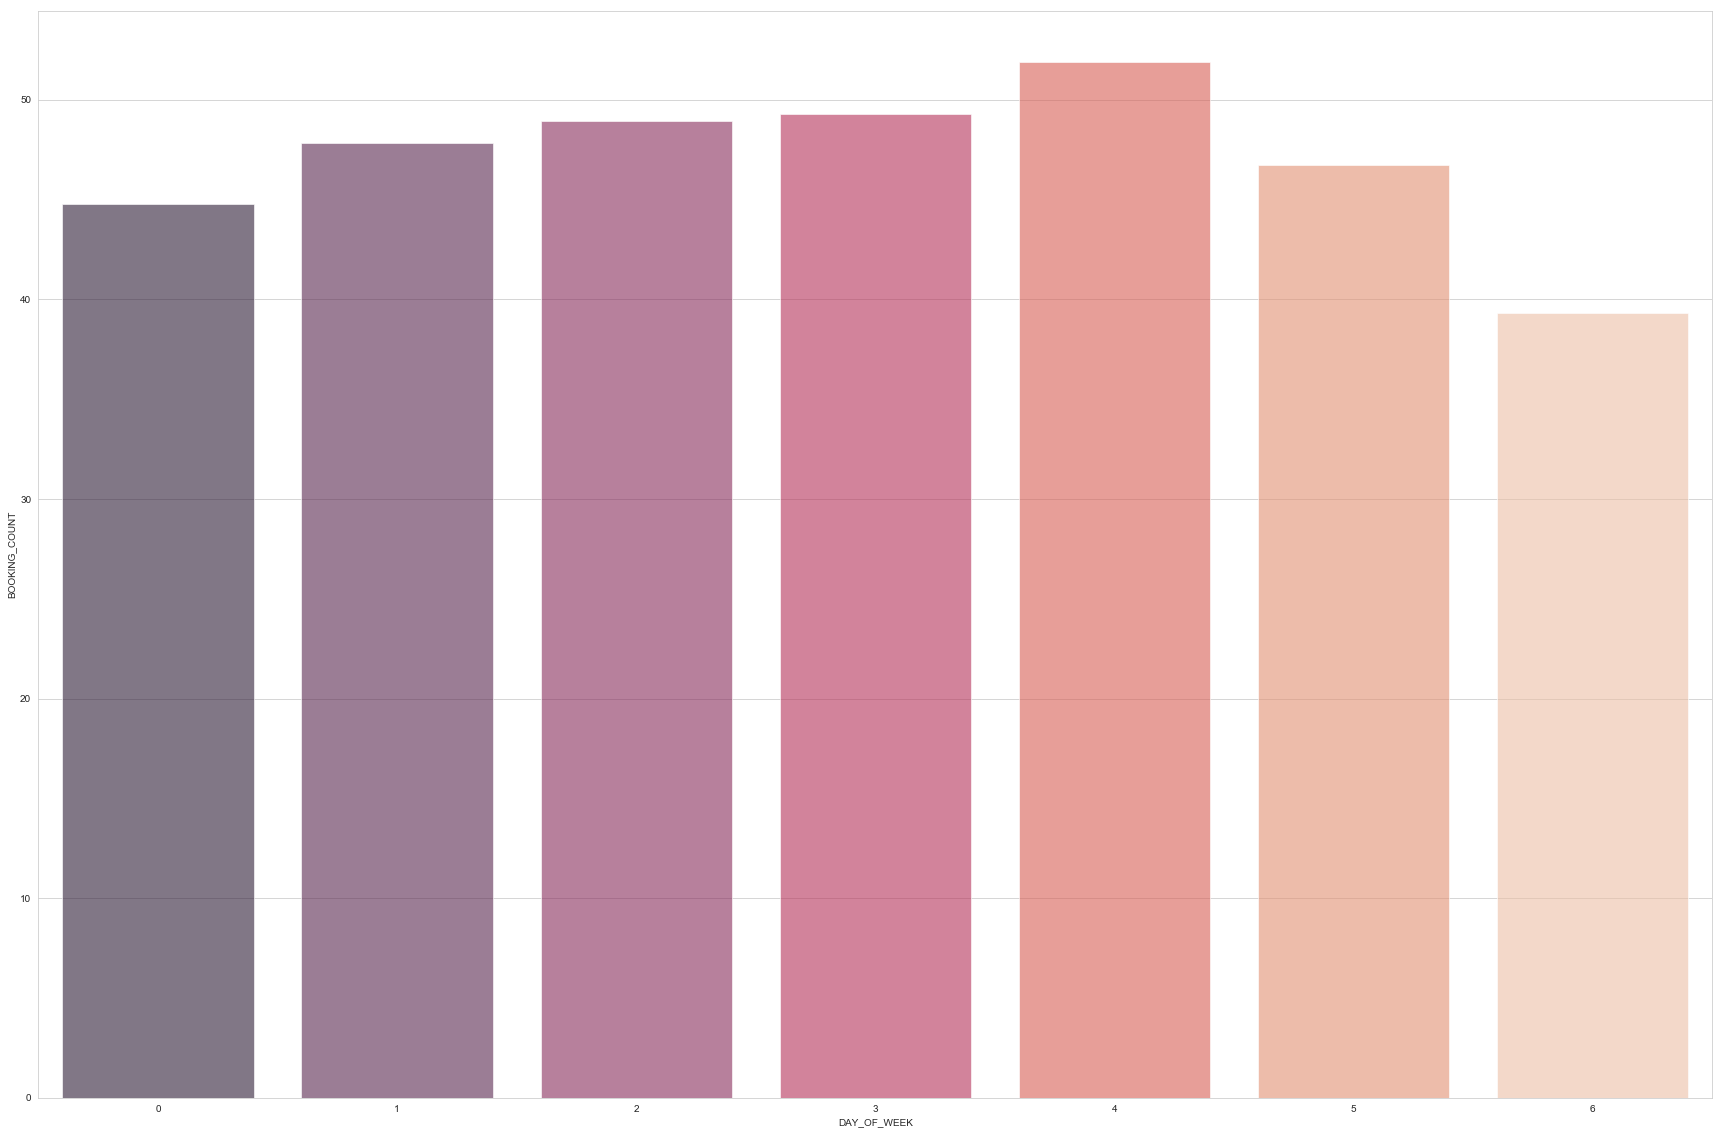

In [73]:
f,ax = plt.subplots(figsize = (30,20))


plot = sns.barplot(x = "DAY_OF_WEEK", y = "BOOKING_COUNT", data = prototype, palette="rocket", alpha = 0.6, ci = None)


Here, it becomes obvious that there is a clear difference between bike rental counts based on whether its weekend or not. It is especially obvious that sundays seem to be highly unattractive for bike rental customers.

colclusion: the hypothesis is wrong. The demand seems to be higher during weeksdays. There is a certain chance that rentals peak on fridays, because friday combines the demand for transportation to work / educational institution with the option to spend more freetime in the evening, respectively to the beginning of the weekend on the next day. The fact that rental counts are generally lower during weekends is probably occuring due to the shortfall of people that usually make use of bike rentals as a transport opportunnity to get to work / educational institiution.


--> a feature that describes wether a day is a weekend-day or working-day might be useful 

# Hypothesis 2 : Rides during the weekend are longer because they oftentimes do not serve the purpose of getting to a certain place within a certain time, but rather serve as an activity. 

In [74]:
to_visualize = prototype.groupby([prototype.index.weekday])["AVG_TRIP_LENGTH"].mean()


to_visualize = to_visualize.reset_index()
to_visualize

DATE  AVG_TRIP_LENGTH
0     0        21.234837
1     1        17.993609
2     2        18.845918
3     3        20.962636
4     4        22.998149
5     5        27.424019
6     6        26.337185

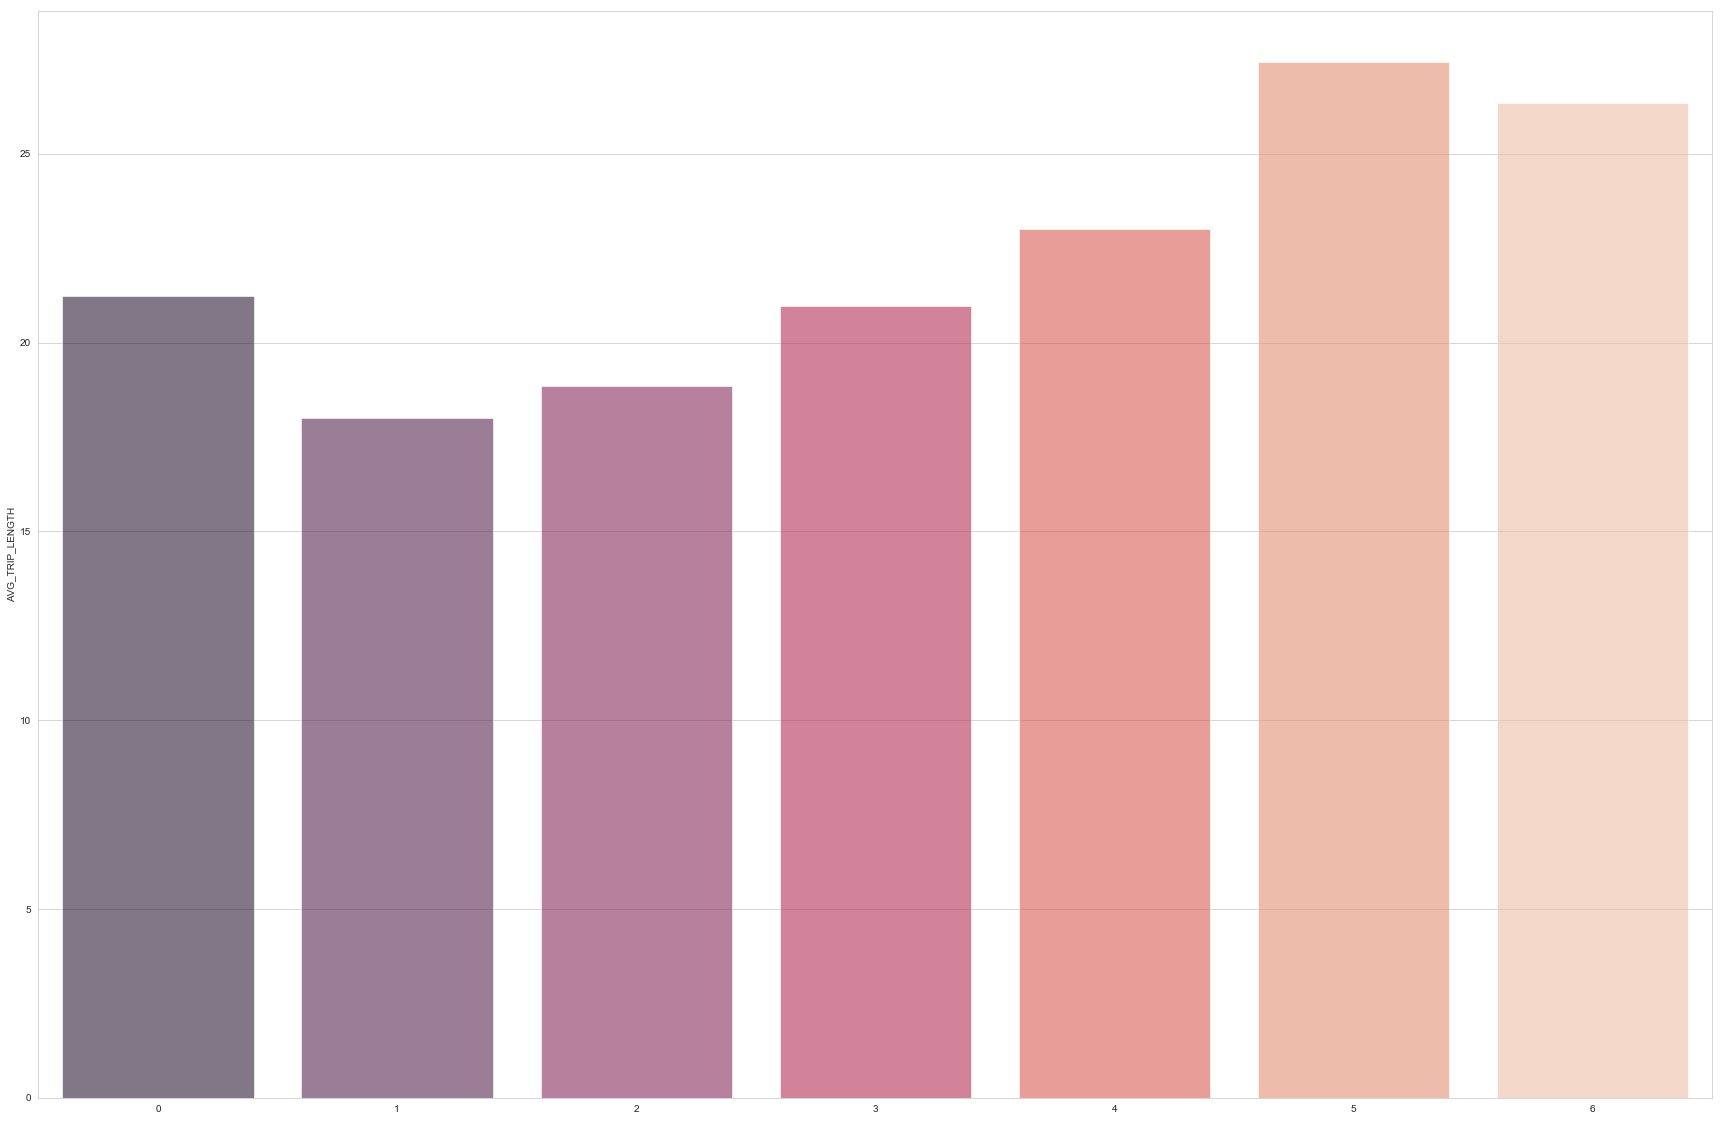

In [75]:
f,ax = plt.subplots(figsize = (30,20))

sns.barplot(x = to_visualize.index, y = "AVG_TRIP_LENGTH" , data = to_visualize, palette="rocket", alpha = 0.6)

trip length increases during the second half of a week and peaks on saturdays. Generally, trips are about 10 minutes longer than average during weekends. 

conclusion: In fact, the trip length is significally longer during weekends. Therefore the hypothesis is likely to be true.

# Hypothesis 3 : Higher Tempererature means more people using bikes and vice versa

In [76]:
to_visualize = prototype

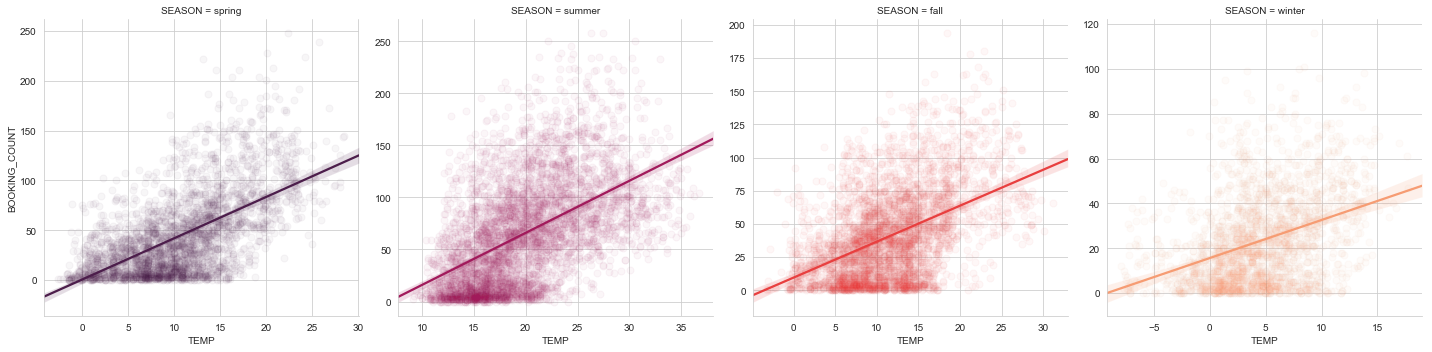

In [77]:
# scatter_kws={"alpha": 0.04, "color": "midnightblue", "s": 120}, line_kws={"color": "black"}
sns.lmplot(x = "TEMP", y = "BOOKING_COUNT", data = to_visualize, ci = 100,  hue = "SEASON",col = "SEASON", palette = "rocket", scatter_kws={"alpha": 0.04, "s": 50}, sharex = False, sharey = False)

the regression lines (that fit the data points as good as possible) clearly show that during all seasons, temperature positively influences bike rental counts. 

Apart from that there is a high density of datapoints close to 0 booking counts at rather low temperatures. We should figure out where that comes from:

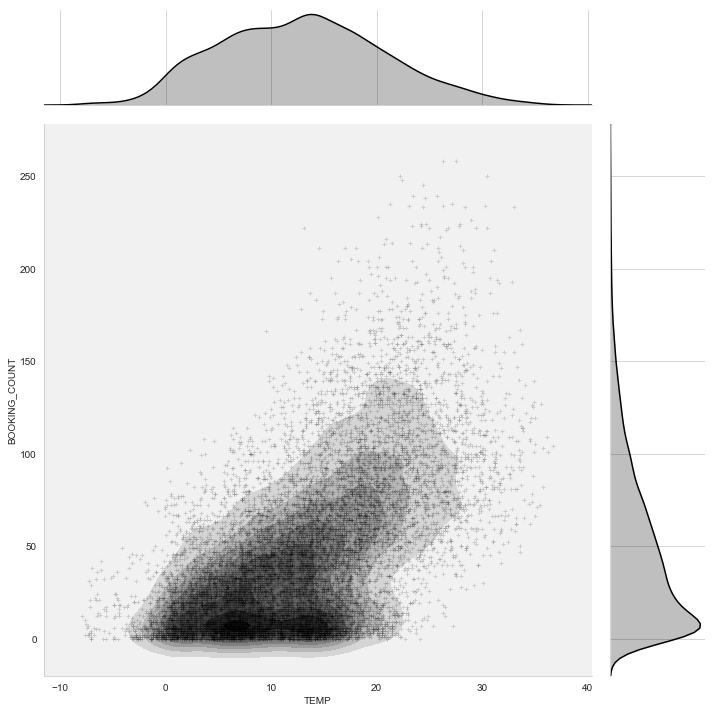

In [78]:

plot = sns.jointplot("TEMP", "BOOKING_COUNT", data = to_visualize, kind="kde", color = "black",height = 10, n_levels=8).plot_joint(plt.scatter, c="k", s=10, linewidth=1, marker="+", alpha = 0.15)


At 20°C + temperatures, there are rarely any records that count less than 50 bike-rentals/hour. Also, it is noticeable that there are barely any hours with 100+ booking counts at temperatures below 15°C. A positive corellation that was visible in the other plots already.

The high density of data points between 0°C  & 20°C  at low booking counts occure the most often.That makes sense, if you take evening-, nighttime- & early-morning-temperatures into account. These hours usually provide rather low temperatures as well as low booking counts (as examined in Hypothesis 19).  

To get a depiction unbiased of these factors, lets redraw the plot, by only taking daytimehours into account (we chose 7:00 -22:00, because we think thats a good Compromise between getting rid of the nighttime bias while retaining enough information to examine the corellation between bike rentals and temperature in general): 

In [79]:
to_visualize = to_visualize.between_time("7:00:00", "22:00")

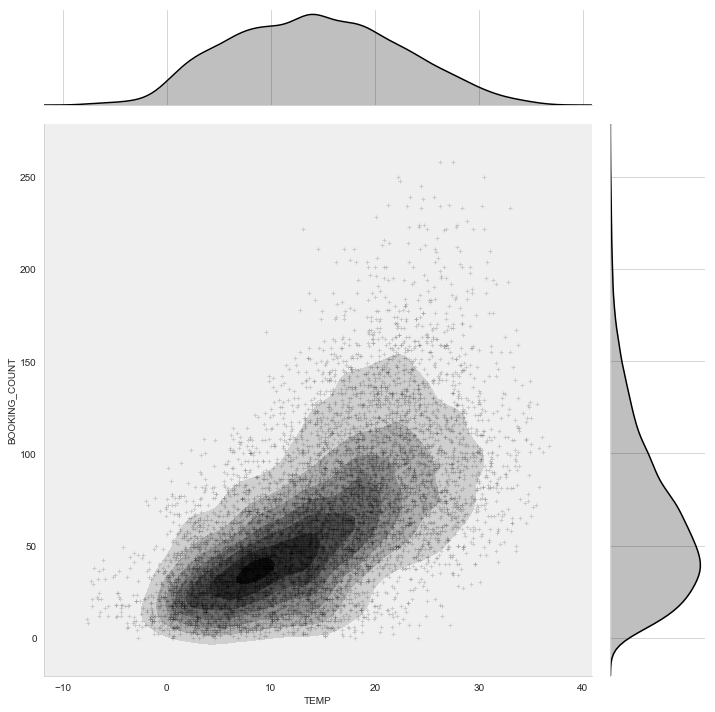

In [80]:
plot = sns.jointplot("TEMP", "BOOKING_COUNT", data = to_visualize, kind="kde", color = "k",height = 10, n_levels=8).plot_joint(plt.scatter, c="black", s=10, linewidth=1, marker="+", alpha = 0.15)

From what we can see now and taking into account the regression line of the seasonal plots, it is almost safe to say that during the time of day where temperature varies most (~ 7:00 to 22:00) (and bike rentals are generally alot higher -> Hypothesis 19) temperature seems to be an extremely important factor to influence the bike rantal demand. 

# Hypothesis 4: Rain means less people using bikes.

In [81]:
to_visualize = prototype

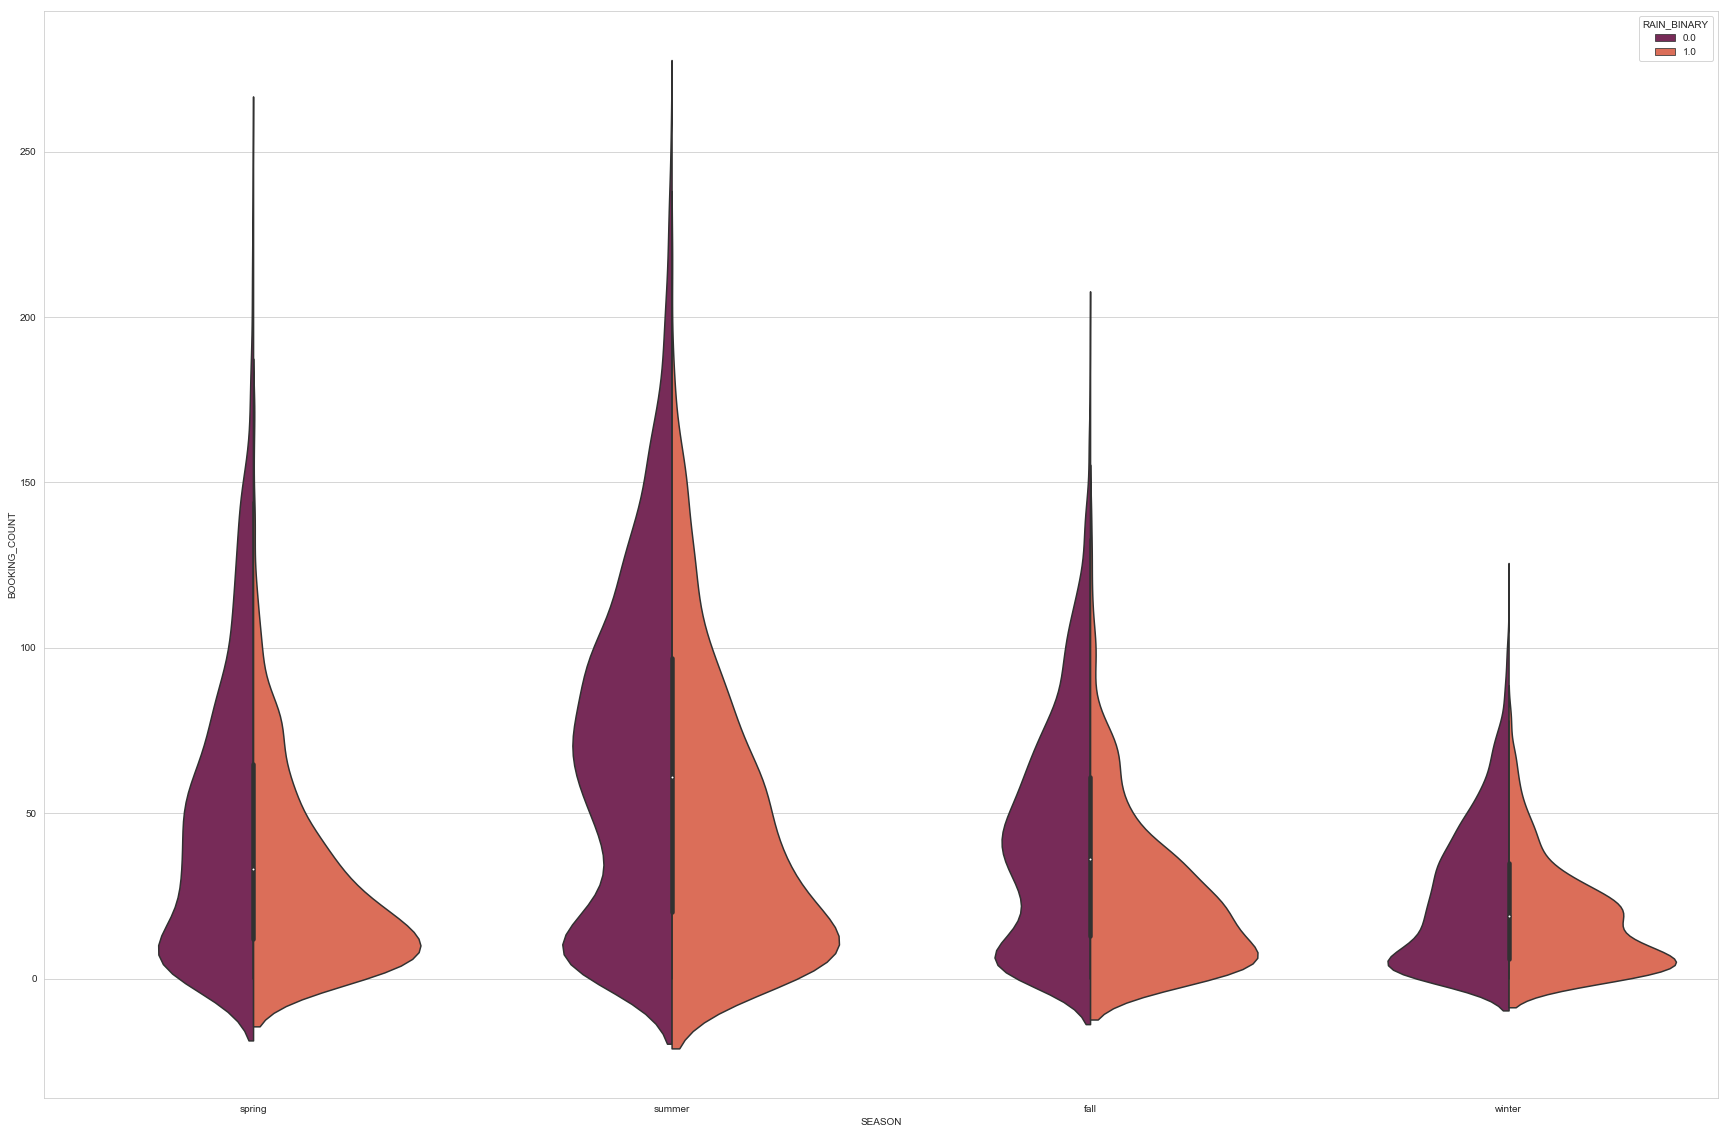

In [82]:
f,ax = plt.subplots(figsize = (30,20))

plot = sns.violinplot("SEASON", "BOOKING_COUNT", hue="RAIN_BINARY",palette="rocket", data=to_visualize, split = True, violin_kws={"alpha":0.5})

we can see that generally our hypothesis seems to be right. But as with visualizing temperature, general low rental hours distort the plot a little. Lets take a look at  daytime hours only to see if our hypothesis is actually correct:



In [83]:
to_visualize = to_visualize.between_time("7:00:00", "22:00")

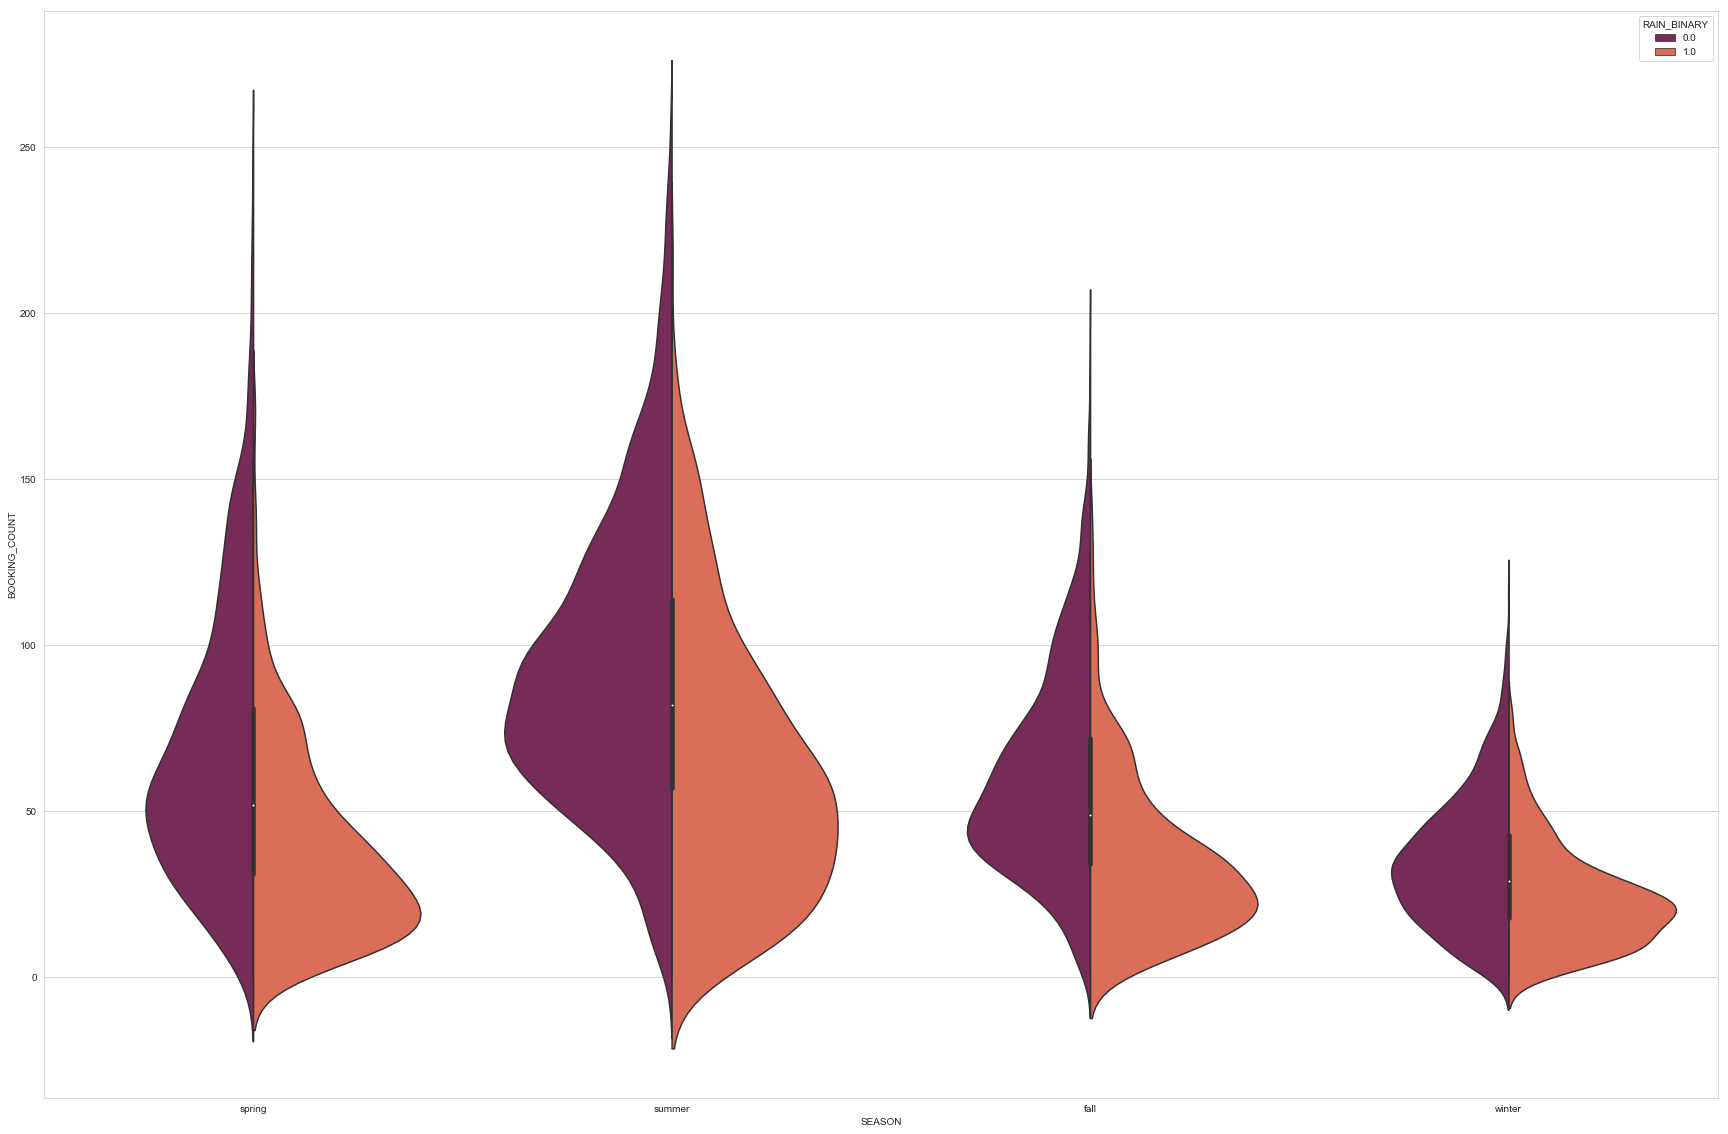

In [84]:
f,ax = plt.subplots(figsize = (30,20))

plot = sns.violinplot("SEASON", "BOOKING_COUNT", hue="RAIN_BINARY",palette="rocket", data=to_visualize, split = True, violin_kws={"alpha":0.5})

as expected, we now have proof that rain actually has a negative affect on bike rentals, no matter what season we look at.

Lets try to find out wether the amount of rain is relevant as well :


In [85]:
to_visualize = to_visualize.where(to_visualize["PREC_HEIGHT_MM"] > 0.01) # ignor hours with almost no rain


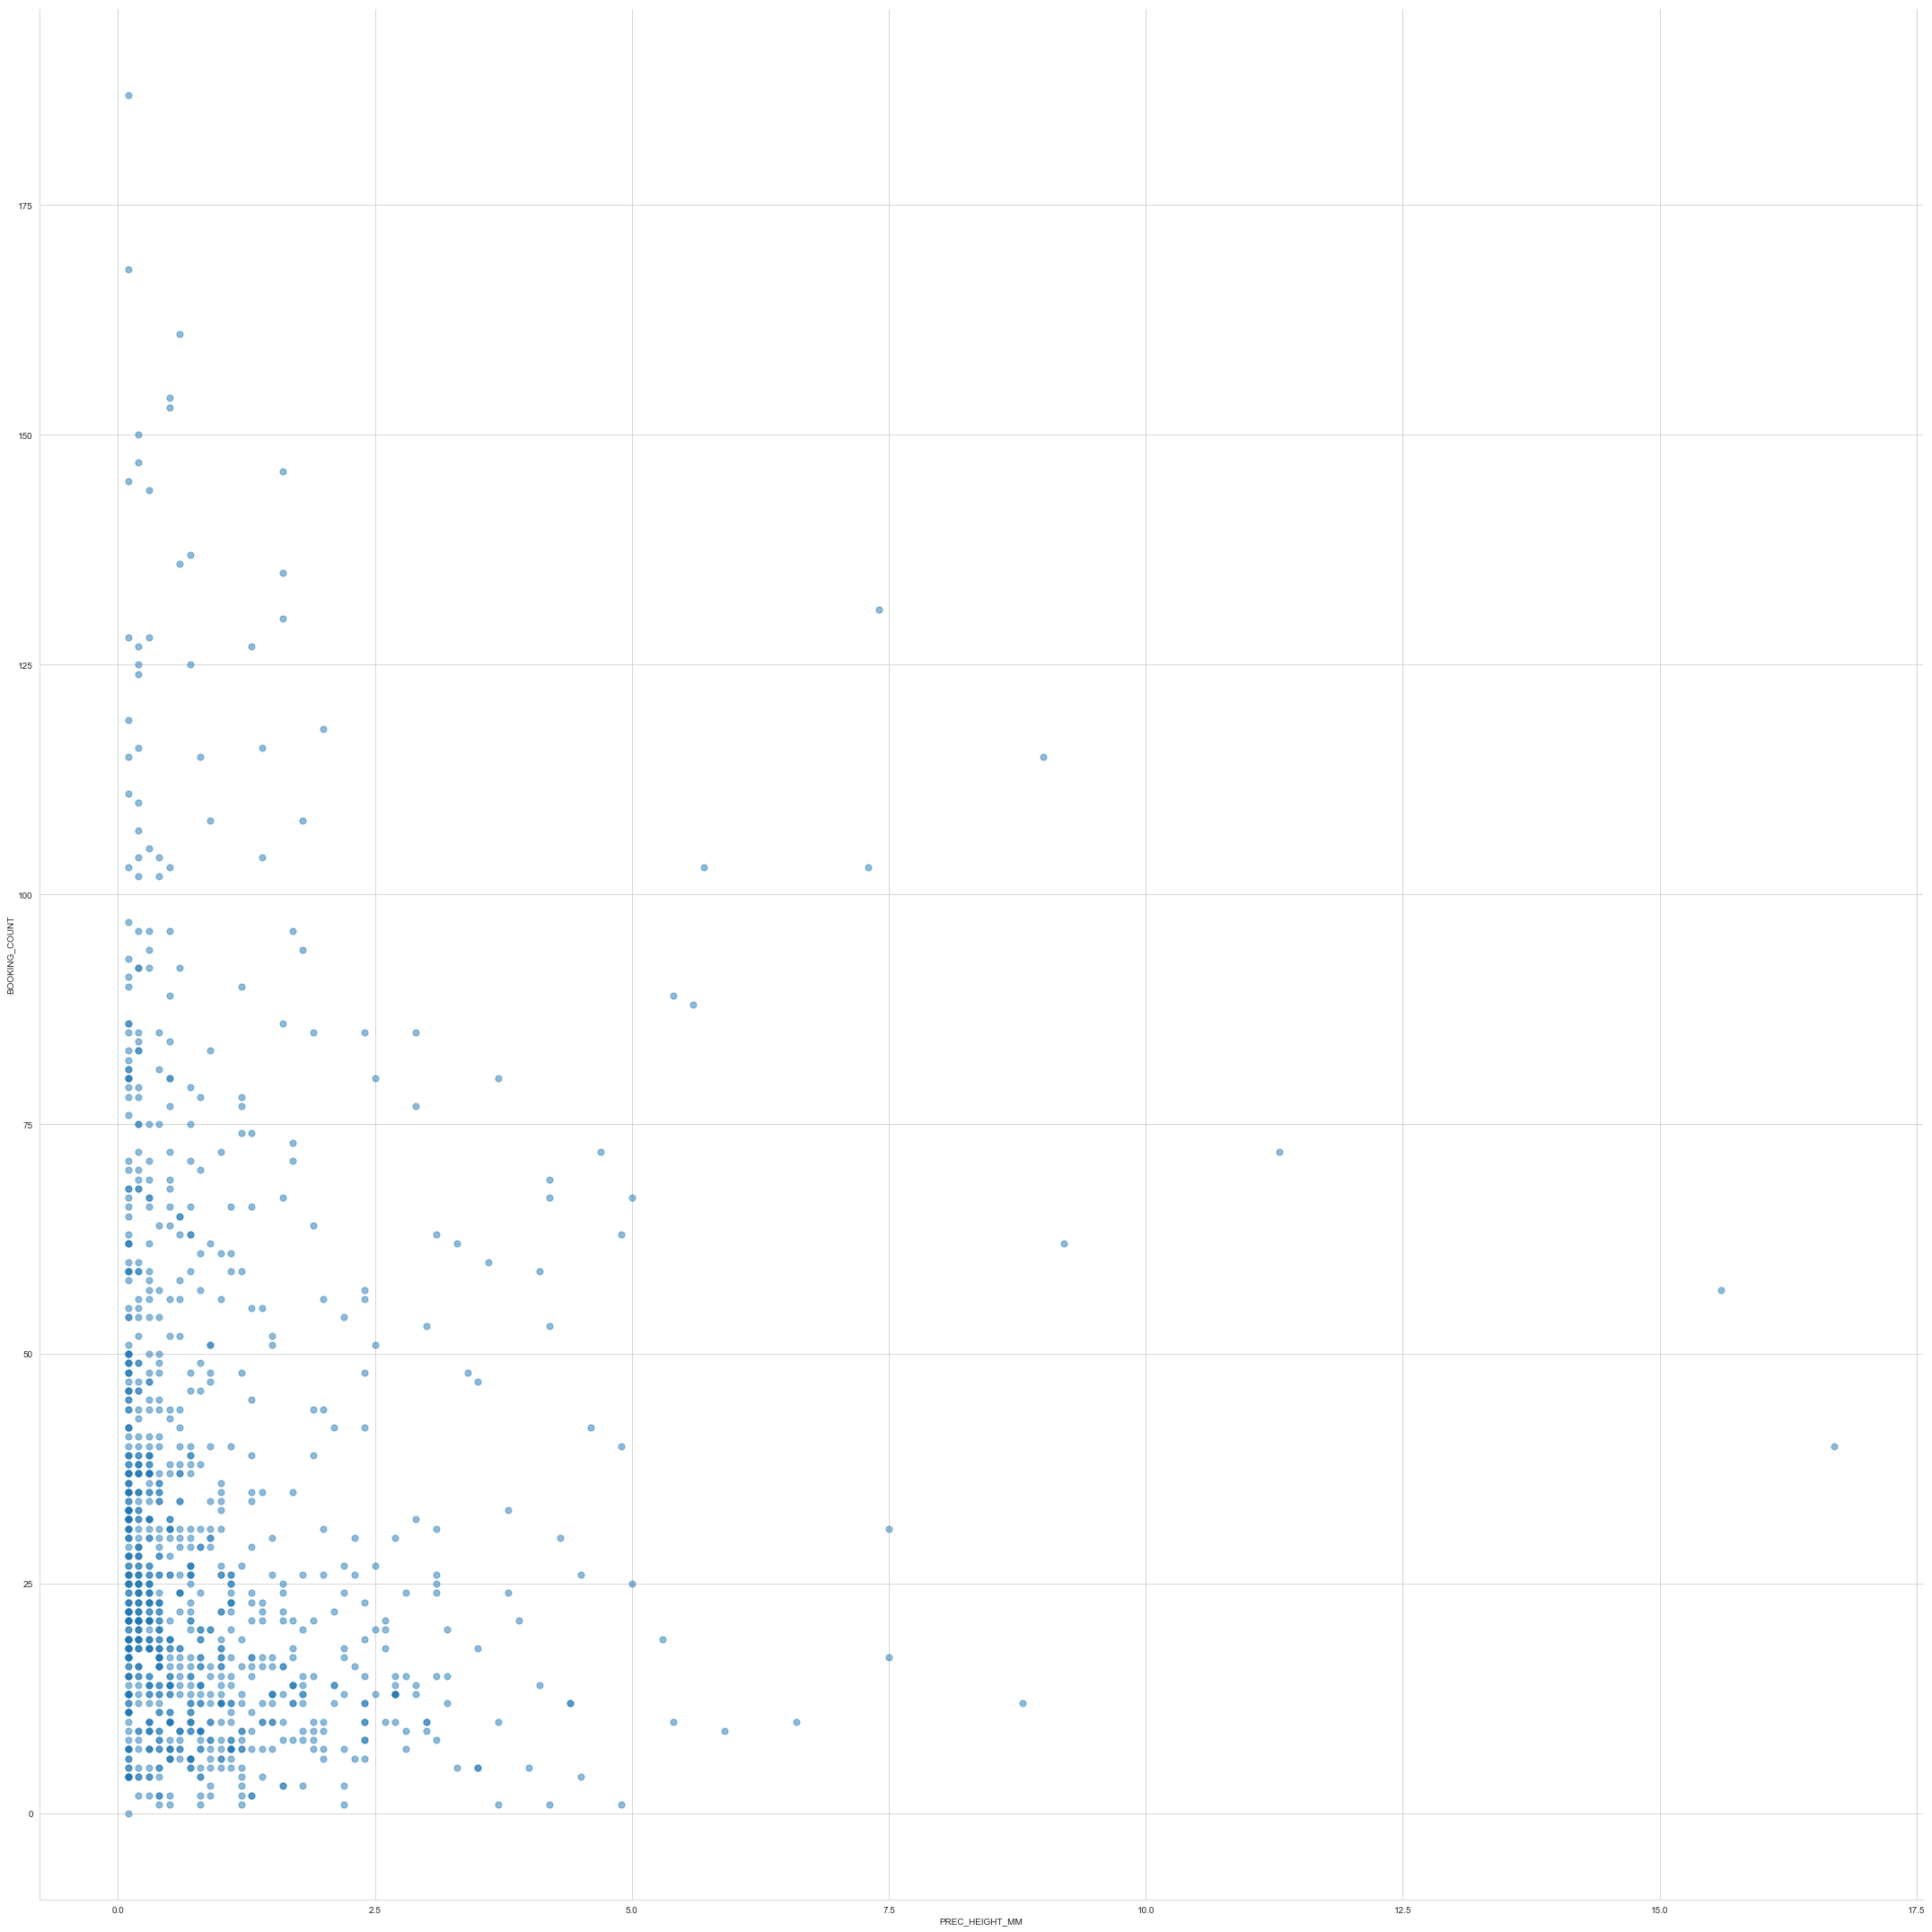

In [86]:
sns.lmplot(x = "PREC_HEIGHT_MM", y = "BOOKING_COUNT", data = to_visualize, ci = 100, height = 30,fit_reg=False,  scatter_kws={"alpha": 0.5, "s": 50})

there are not many instances to plot, so it is hard to draw any conclusions form that feature. 

suggestion ---> explore the booking based indexed dataset towards corellations with precipitation height !

# Hypothesis 5: Cloudiness means less people using bikes

In [87]:
to_visualize = prototype

In [88]:
to_visualize = to_visualize.between_time("7:00:00", "22:00")

In [89]:
from matplotlib.colors import LogNorm

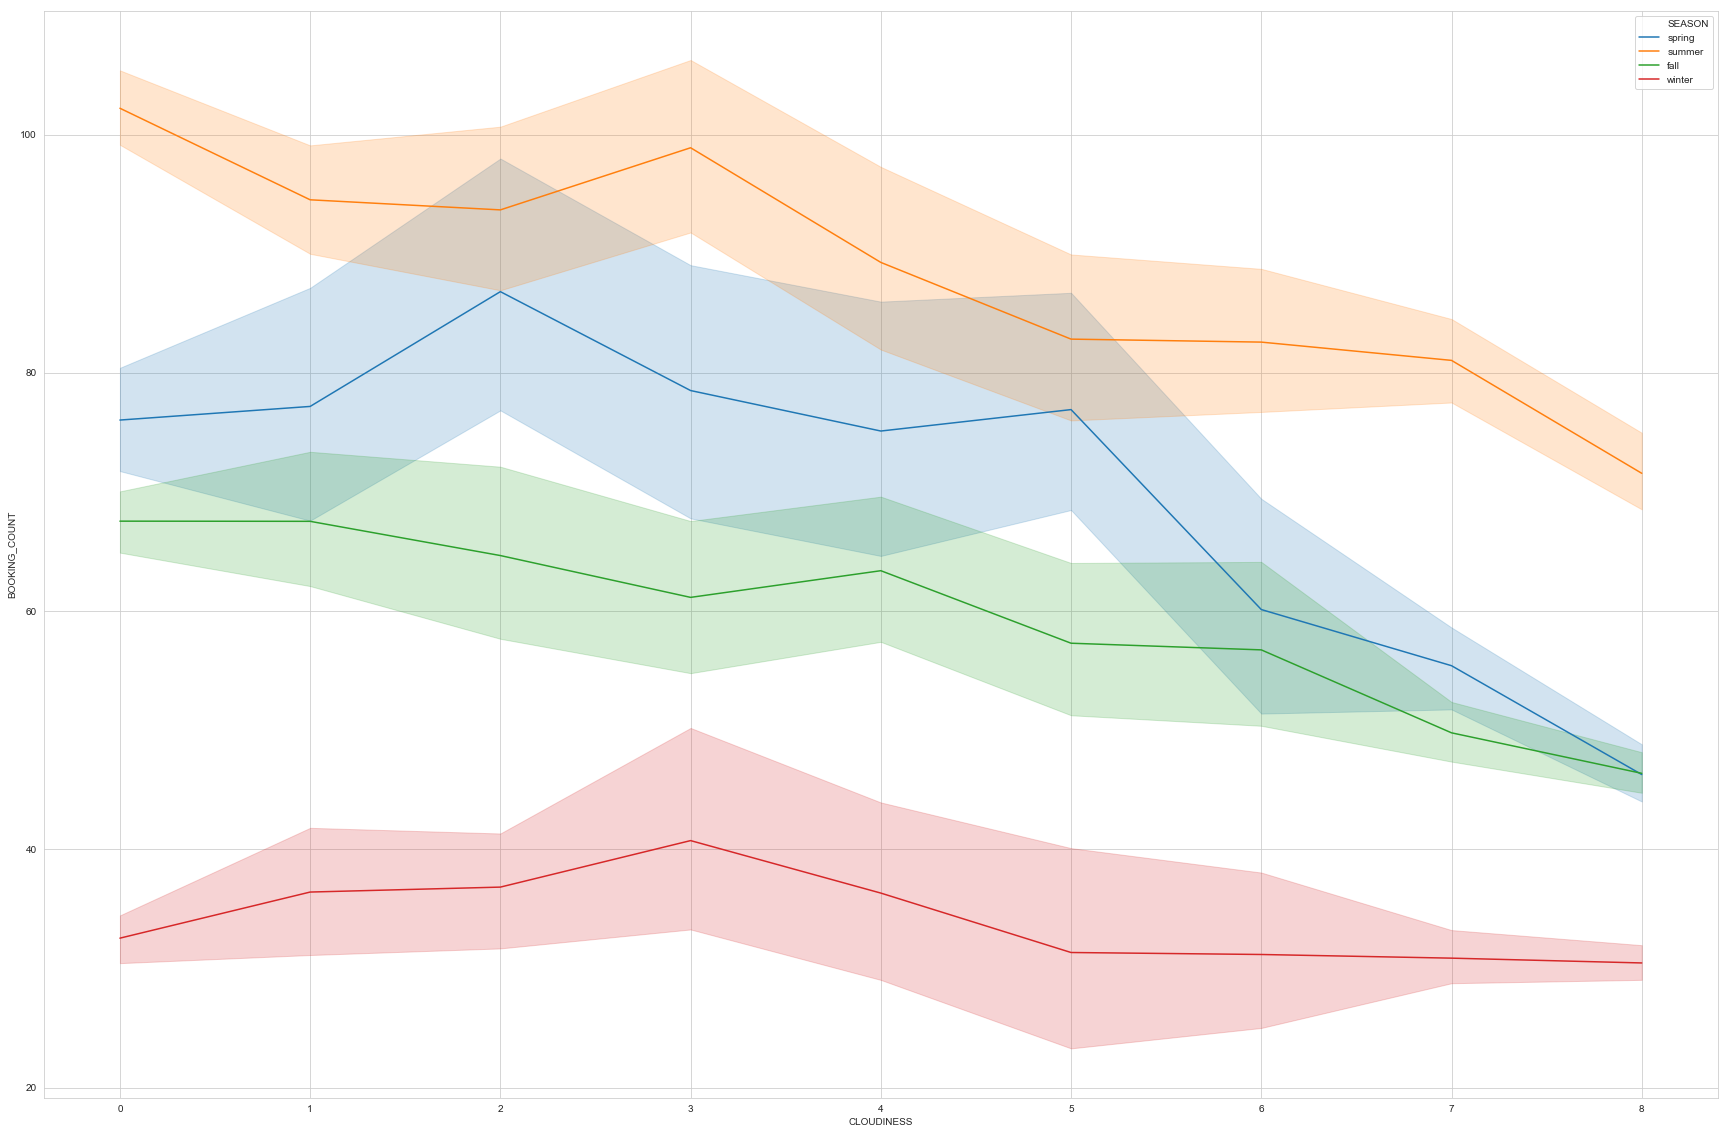

In [90]:
f,ax = plt.subplots(figsize = (30,20))

sns.lineplot(y="BOOKING_COUNT", x="CLOUDINESS",hue = "SEASON", err_style="band" , hue_norm=LogNorm(), data=to_visualize, )

we can see that during all seasons cloudiness has a negative effect on bike rentals, but doesnt seem to be as impactfull as e.g. Temperature, especially during winter season.

# Hypothesis 6: Strong Winds mean less bike rentals. 

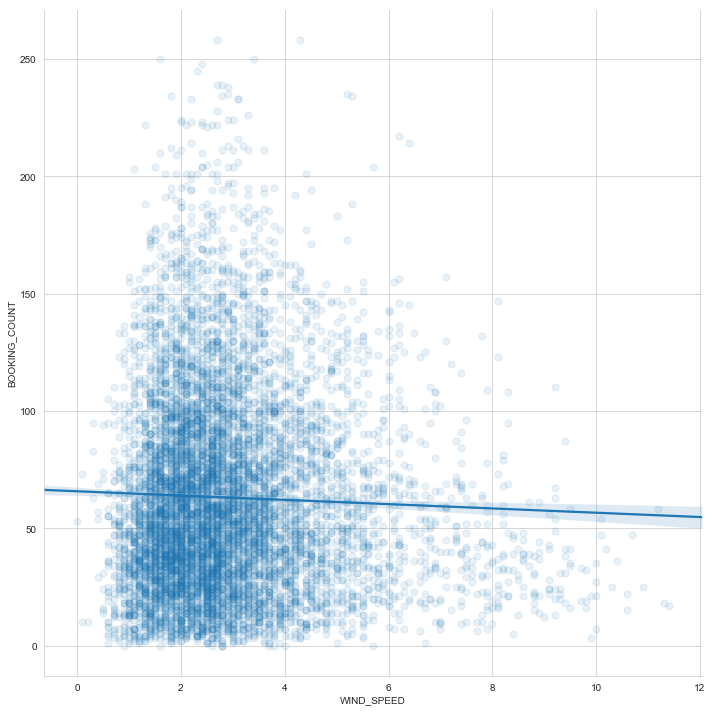

In [91]:

sns.lmplot(y="BOOKING_COUNT", x="WIND_SPEED", data=to_visualize, height=10, scatter_kws={"alpha": 0.1, "s": 50})

have a look at really strong wind speeds only:

In [92]:
to_visualize = to_visualize.where(to_visualize["WIND_SPEED"] > 4)

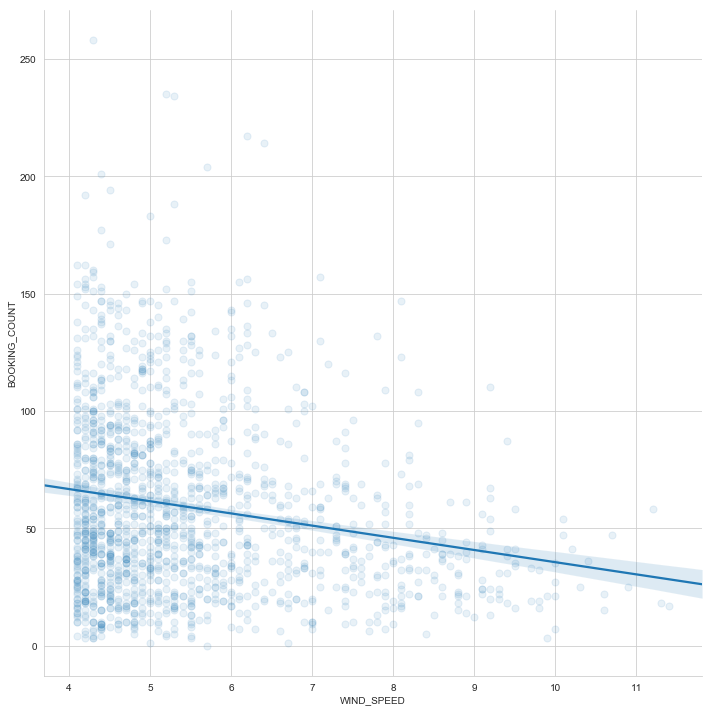

In [93]:
sns.lmplot(y="BOOKING_COUNT", x="WIND_SPEED", data=to_visualize, height=10, scatter_kws={"alpha": 0.1, "s": 50})

now we can see that strong wind clearly has a negative effect on bike rentals, while normal winds are not that relevant

# Hypothesis 12: More Bike rentals occure during Summer Time

In [ ]:
to_visualize = prototype

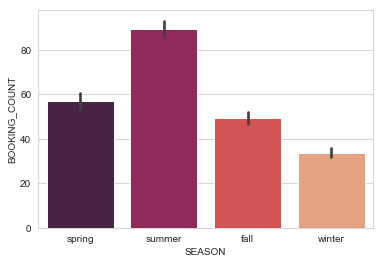

In [95]:
sns.barplot(x = to_visualize.SEASON, y = "BOOKING_COUNT", data = to_visualize, palette = "rocket")

# Hypothesis 13: As days are longer during summer, more people will book bikes later in the evening

In [97]:
to_visualize = prototype

[Text(0,0.5,'Bookings'), Text(0.5,0,'Hour')]

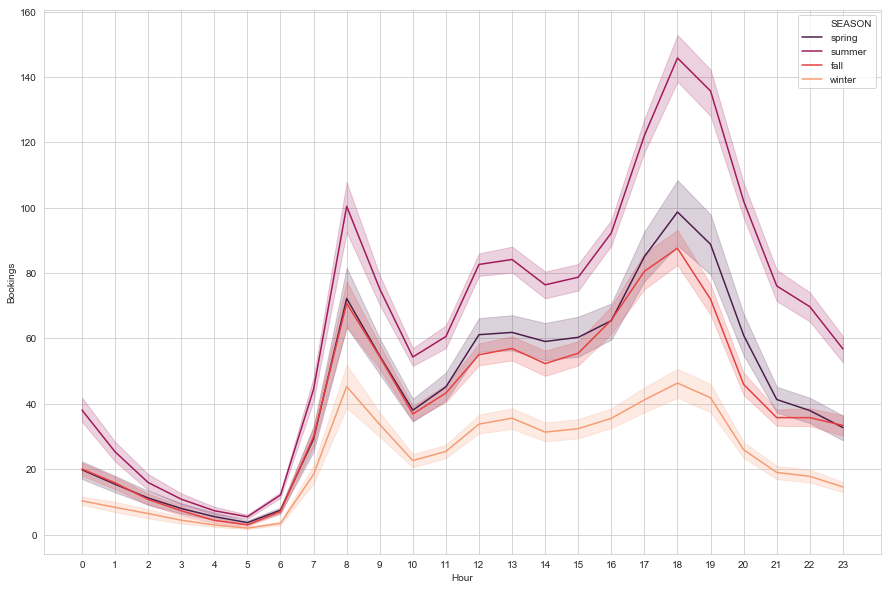

In [98]:
f = plt.figure(figsize=(15, 10))

plt.xticks(np.arange(0,24, 1))
ax = sns.lineplot(x = to_visualize.index.hour, y = "BOOKING_COUNT", data = to_visualize, color = "maroon", ci = 95,hue = "SEASON", palette = "rocket")
ax.set(xlabel = "Hour", ylabel = "Bookings")

#### In general bikes get rented during summertime more, but people do not book significantly more bikes in summer compared to the other seasons.

# Hypothesis 14: Bike rentals reduce significantly during christmas Holiday

In [99]:
to_visualize = prototype

dec = to_visualize[to_visualize.index.month ==  12]

temp = dec.groupby([dec.index.day])["BOOKING_COUNT"].sum()

f= plt.figure(figsize = (15,10))

december = sns.lineplot(x = temp.index, y = temp, color = "black",ci = 50)
plt.xticks(np.arange(0,32, 1))
december.axvspan(23, 27, color='red', alpha=0.5)

#### You can see a significant drop during christmas holidays. You can also see that at the 31st the booking count drops again. It seems like special holidays have a greater impact on rentals.

# Hypothesis 15: Distance towards next train/Subway/Bus station has an influence on bike rental demand

#### To answer this hypothesis we need geographical data.

# Hypothesis 16: Bike rentals rise when frequency of train-ride-options decreases (e.g. if after 9pm trains go less often)

#### With the given dataset we can not answer this Hypothesis. All we can say is that the rentalbike usage decreases during night time.

# Hypothesis 17: There are more short rides(10 - 20 mins) than long rides (30 mins +)

In [106]:
to_visualize = work_set_train

[Text(0.5,0,'Ride duration')]

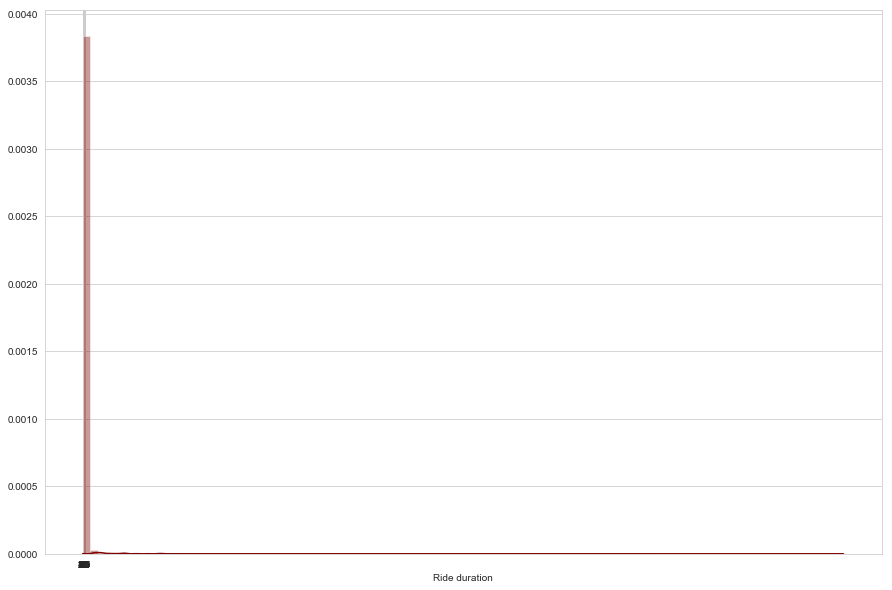

In [107]:
# Plotting with work_set_train
f, axes = plt.subplots(figsize=(15, 10))

plt.xticks(np.arange(0,100, 5))
dist = sns.distplot(to_visualize.TRIP_LENGTH,bins = 100, color="maroon")
dist.set(xlabel = "Ride duration")

#### We need to clean our dataset from TRIP_LENGHT values that are too long to be reasonable

# clean to_viszualize.TRIP_LENGTH values > 360min

## todo: clean work_set_train & work_set_test

In [108]:
#all trips with a duration > 6 hours
to_visualize.TRIP_LENGTH[to_visualize["TRIP_LENGTH"]>60*6]

DATE
2015-05-02 10:05:13     528.983333
2015-05-02 11:02:07     582.566667
2015-05-02 11:07:52     576.250000
2015-05-02 11:29:56    2693.133333
2015-05-02 11:38:34     684.500000
2015-05-02 11:40:03    2683.366667
2015-05-02 11:41:34     681.083333
2015-05-02 12:58:54     497.583333
2015-05-02 14:12:52    1569.400000
2015-05-02 14:23:50     407.750000
2015-05-02 15:45:55     382.066667
2015-05-02 16:25:14    2663.966667
2015-05-03 20:05:55    5321.100000
2015-05-04 11:43:18    2675.433333
2015-05-04 12:52:53     407.616667
2015-05-04 14:22:06     590.616667
2015-05-04 18:51:27     397.266667
2015-05-05 07:27:33     786.100000
2015-05-05 07:49:14    2100.866667
2015-05-05 08:36:11     523.083333
2015-05-05 11:50:22     625.500000
2015-05-05 13:50:53    1288.033333
2015-05-05 13:51:33     516.916667
2015-05-05 20:42:54     672.500000
2015-05-06 11:34:32    3124.300000
2015-05-06 17:31:59    4498.100000
2015-05-06 18:23:43     735.950000
2015-05-06 18:24:20     872.450000
2015-05-06 23:0

In [109]:
#filling in with TRIP_LENGTH mean

mean = to_visualize["TRIP_LENGTH"].mean()

to_visualize.TRIP_LENGTH[to_visualize["TRIP_LENGTH"] > 60*6] = mean

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

[Text(0.5,0,'Ride duration')]

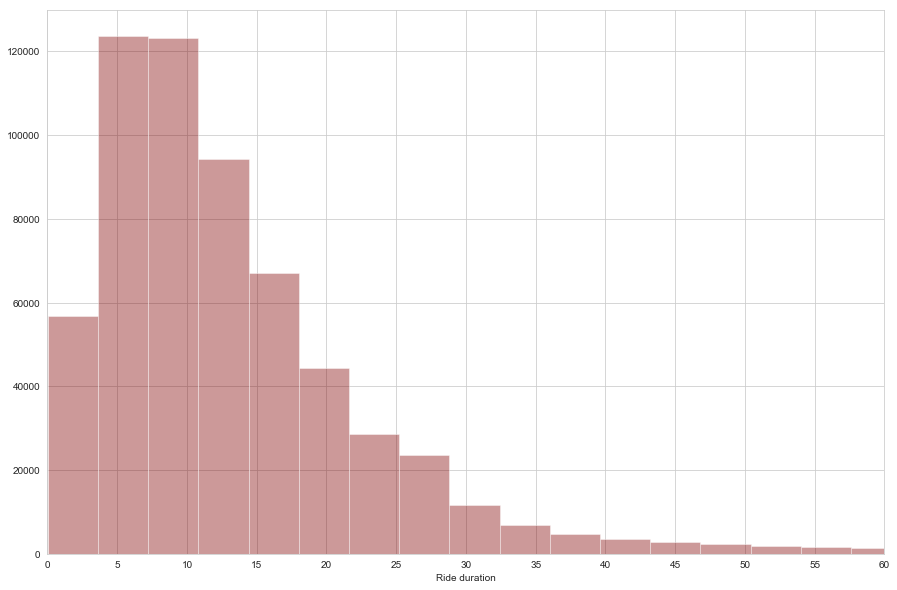

In [110]:
# Plotting with work_set_train
# x-axis limited on 1 hour
f= plt.figure(figsize=(15, 10))

plt.xticks(np.arange(0,100, 5))
dist = sns.distplot(to_visualize.TRIP_LENGTH,bins = 100, color="maroon",kde=False)
dist.set_xlim(0,60)
dist.set(xlabel = "Ride duration")

#### This plot confirms our Hypothesis. You can see that most of the rental durations appear to be 5-10 minutes long.

# Hypothesis 18: Trip length correllates with limitations of subscriptions (e.g. students may be able to use bikes for free up to 30 mins)

#### To answer this Hypothesis, we need information about subscriptions. Procuring this data may be too much effort for the given task.

# Hypothesis 19: Less people rent bikes at night

In [111]:
to_visualize = prototype

[Text(0,0.5,'Bookings'), Text(0.5,0,'Hour')]

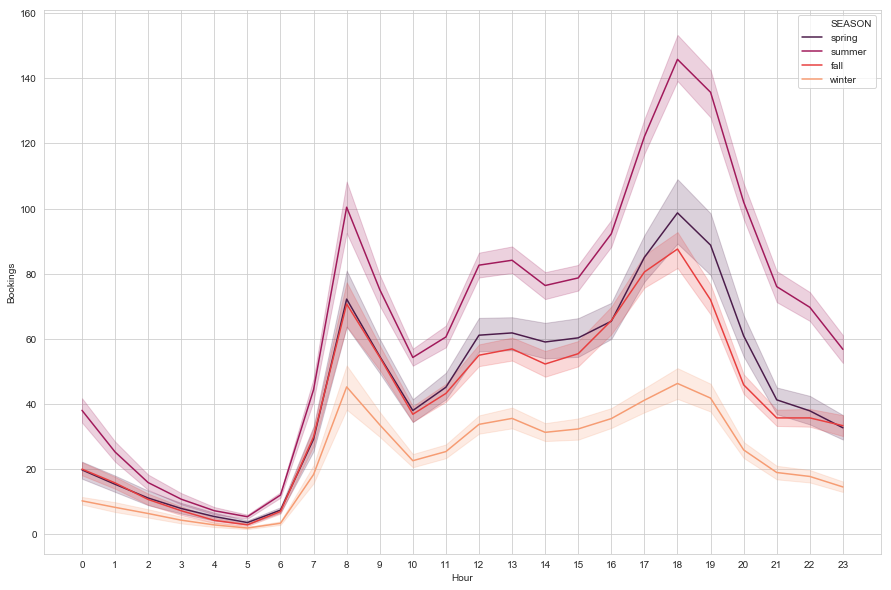

In [112]:
f = plt.figure(figsize=(15, 10))

plt.xticks(np.arange(0,24, 1))
ax = sns.lineplot(x = to_visualize.index.hour, y = "BOOKING_COUNT", data = to_visualize, color = "maroon", ci = 95,hue = "SEASON", palette = "rocket")
ax.set(xlabel = "Hour", ylabel = "Bookings")

#### Peak usage of rentalbikes seems to be around 6pm. You can also see that the usage goes down during nightime. 